# Project #3 Supervised Learning - ReCell


# Description

## Context

Buying and selling used smartphones used to be something that happened on a handful of online marketplace sites. But the used and refurbished phone market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth $52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used smartphones that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing a smartphone. There are plenty of other benefits associated with the used smartphone market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished smartphones. Maximizing the longevity of mobile phones through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost the cheaper refurbished smartphone segment, as consumers cut back on discretionary spending and buy phones only for immediate needs.

 

## Objective
The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished smartphones. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone and identify factors that significantly influence it.

 

## Data Description

The data contains the different attributes of used/refurbished phones. The detailed data dictionary is given below.

### Data Dictionary

- brand_name: Name of manufacturing brand
- os: OS on which the phone runs
- screen_size: Size of the screen in cm
- 4g: Whether 4G is available or not
- 5g: Whether 5G is available or not
- main_camera_mp: Resolution of the rear camera in megapixels
- selfie_camera_mp: Resolution of the front camera in megapixels
- int_memory: Amount of internal memory (ROM) in GB
- ram: Amount of RAM in GB
- battery: Energy capacity of the phone battery in mAh
- weight: Weight of the phone in grams
- release_year: Year when the phone model was released
- days_used: Number of days the used/refurbished phone has been used
- new_price: Price of a new phone of the same model in euros
- used_price: Price of the used/refurbished phone in euros


## Objective
To analyze the data and build a linear regression model to predict the price of a used phone and identify factors that significantly influence it.

**Questions**:

1. What does the distribution of used phone prices look like?
2. What percentage of the used phone market is dominated by Android devices?
3. The amount of RAM is important for the smooth functioning of a phone. How does the amount of RAM vary with the brand?
4. A large battery often increases a phone's weight, making it feel uncomfortable in the hands. How does the weight vary for phones offering large batteries (more than 4500 mAh)?
5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones are available across different brands with a screen size larger than 6 inches? 
6. Budget phones nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of budget phones offering greater than 8MP selfie cameras across brands?
7. Which attributes are highly correlated with the used phone price?

## Importing necessary libraries and data

In [1]:
# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline
import seaborn as sns


# to split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# to build linear regression_model using statsmodels
import statsmodels.api as sm


sns.set()

# Removes the limit from the number of displayed columns and rows.
# This is so I can see the entire dataframe when I print it
pd.set_option("display.max_columns", None)
# pd.set_option('display.max_rows', None)
pd.set_option("display.max_rows", 200)

<IPython.core.display.Javascript object>

In [3]:
# Let's load and check the shape of the dataset
usphone_df = pd.read_csv("used_phone_data.csv")
print(
    f"There are {usphone_df.shape[0]} rows and {usphone_df.shape[1]} columns."
)  # f-string

There are 3571 rows and 15 columns.


<IPython.core.display.Javascript object>

## Data Overview

- Observations
- Sanity checks

In [4]:
# let's view a sample of the data
usphone_df.sample(n=20, random_state=1)

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,used_price
2501,Samsung,Android,13.49,yes,no,13.0,13.0,32.0,4.00,3600.0,181.0,2017,683,198.6800,79.47
2782,Sony,Android,13.81,yes,no,NaN,8.0,32.0,4.00,3300.0,156.0,2019,195,198.1500,149.10
605,Others,Android,12.70,yes,no,8.0,5.0,16.0,4.00,2400.0,137.0,2015,1048,161.4700,48.39
2923,Vivo,Android,19.37,yes,no,13.0,16.0,64.0,4.00,3260.0,149.3,2019,375,211.8800,138.31
941,Others,Others,5.72,no,no,0.3,0.3,32.0,0.25,820.0,90.0,2013,883,29.8100,8.92
1833,LG,Android,13.49,no,no,8.0,1.3,32.0,4.00,3140.0,161.0,2013,670,240.5400,96.18
671,Apple,iOS,14.92,yes,no,12.0,7.0,64.0,4.00,5493.0,48.0,2018,403,700.1500,350.08
1796,LG,Android,17.78,yes,no,5.0,0.3,16.0,4.00,4000.0,294.8,2014,708,189.3000,75.94
757,Asus,Android,13.49,yes,no,13.0,8.0,32.0,4.00,5000.0,181.0,2017,612,270.5000,108.13
3528,Realme,Android,15.72,yes,no,NaN,16.0,64.0,4.00,4035.0,184.0,2019,433,159.8850,80.00


<IPython.core.display.Javascript object>

In [5]:
# Let's look at the statistical summary of the data
usphone_df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
brand_name,3571,34,Others,509,NaN,NaN,NaN,NaN,NaN,NaN,NaN
os,3571,4,Android,3246,NaN,NaN,NaN,NaN,NaN,NaN,NaN
screen_size,3571.0,NaN,NaN,NaN,14.803892,5.153092,2.7,12.7,13.49,16.51,46.36
4g,3571,2,yes,2359,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5g,3571,2,no,3419,NaN,NaN,NaN,NaN,NaN,NaN,NaN
main_camera_mp,3391.0,NaN,NaN,NaN,9.400454,4.818396,0.08,5.0,8.0,13.0,48.0
selfie_camera_mp,3569.0,NaN,NaN,NaN,6.547352,6.879359,0.3,2.0,5.0,8.0,32.0
int_memory,3561.0,NaN,NaN,NaN,54.532607,84.696246,0.005,16.0,32.0,64.0,1024.0
ram,3561.0,NaN,NaN,NaN,4.056962,1.391844,0.03,4.0,4.0,4.0,16.0
battery,3565.0,NaN,NaN,NaN,3067.225666,1364.206665,80.0,2100.0,3000.0,4000.0,12000.0


<IPython.core.display.Javascript object>

- There are 34 unique brands with "Others" as the most frequent brand name.
- There are 4 unique operating systems with "Andriod" being the most common.
- Screen size range from 2.7 to 46.4 with an average of 14.8
- 4g and 5g have "yes/no" values. This should be changed to categorical datatypes.
- Release year range from 2013 to 2020.
- Average "Used Price" is approximately 109.88 euros.
- Days used range from 91 to 1094 days.

In [6]:
# checking column datatypes and number of non-null values
usphone_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3571 entries, 0 to 3570
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   brand_name        3571 non-null   object 
 1   os                3571 non-null   object 
 2   screen_size       3571 non-null   float64
 3   4g                3571 non-null   object 
 4   5g                3571 non-null   object 
 5   main_camera_mp    3391 non-null   float64
 6   selfie_camera_mp  3569 non-null   float64
 7   int_memory        3561 non-null   float64
 8   ram               3561 non-null   float64
 9   battery           3565 non-null   float64
 10  weight            3564 non-null   float64
 11  release_year      3571 non-null   int64  
 12  days_used         3571 non-null   int64  
 13  new_price         3571 non-null   float64
 14  used_price        3571 non-null   float64
dtypes: float64(9), int64(2), object(4)
memory usage: 418.6+ KB


<IPython.core.display.Javascript object>

- There are 3,571 rows and 15 columns
- Four variables of datatype "object", nine variables of "float64" datatype and two variables of "int64" datatype.
- Memory usage is at 418.6KB

In [7]:
# Convert object columns to categorical
usphone_df[["brand_name", "os", "4g", "5g"]] = usphone_df[
    ["brand_name", "os", "4g", "5g"]
].apply(lambda x: x.astype("category"))

usphone_df.info()  # Summary of dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3571 entries, 0 to 3570
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   brand_name        3571 non-null   category
 1   os                3571 non-null   category
 2   screen_size       3571 non-null   float64 
 3   4g                3571 non-null   category
 4   5g                3571 non-null   category
 5   main_camera_mp    3391 non-null   float64 
 6   selfie_camera_mp  3569 non-null   float64 
 7   int_memory        3561 non-null   float64 
 8   ram               3561 non-null   float64 
 9   battery           3565 non-null   float64 
 10  weight            3564 non-null   float64 
 11  release_year      3571 non-null   int64   
 12  days_used         3571 non-null   int64   
 13  new_price         3571 non-null   float64 
 14  used_price        3571 non-null   float64 
dtypes: category(4), float64(9), int64(2)
memory usage: 322.7 KB


<IPython.core.display.Javascript object>

- The four variables of type "object" are now categorical variables.
- Memoory usage now lower at 322.7KB

In [8]:
# looking at which columns have the most missing values
usphone_df.isnull().sum().sort_values(ascending=False)

main_camera_mp      180
int_memory           10
ram                  10
weight                7
battery               6
selfie_camera_mp      2
brand_name            0
os                    0
screen_size           0
4g                    0
5g                    0
release_year          0
days_used             0
new_price             0
used_price            0
dtype: int64

<IPython.core.display.Javascript object>

- Six columns have missing values from 180 missing values in main_camera_mp column to two in selfie_camera_mp column
- Target variable (used price) has no missing values

In [9]:
# Let's fill numeric missing values with the median values for the column

missing_value_median = lambda x: x.fillna(x.median())
numeric_columns = usphone_df.select_dtypes(include=np.number).columns.tolist()
usphone_df[numeric_columns] = usphone_df[numeric_columns].apply(
    missing_value_median, axis=0
)

# looking at which columns have the most missing values
usphone_df.isnull().sum().sort_values(ascending=False)

brand_name          0
os                  0
screen_size         0
4g                  0
5g                  0
main_camera_mp      0
selfie_camera_mp    0
int_memory          0
ram                 0
battery             0
weight              0
release_year        0
days_used           0
new_price           0
used_price          0
dtype: int64

<IPython.core.display.Javascript object>

- No more missing values. These have been replaced with the median values for that column.

In [10]:
# check for duplicate values / records
usphone_df.duplicated().sum()

0

<IPython.core.display.Javascript object>

- There are no duplicate records in the data

#### Metric of screen size needs to converted.

In [11]:
# let's convert screen size currently in cm to inches and add a new column to the dataset
usphone_df["screen_size_inches"] = usphone_df["screen_size"] / 2.54

# let's remove the original screen size variable
usphone_df.drop("screen_size", axis=1, inplace=True)

# let's view a sample of the data
usphone_df.sample(n=20, random_state=1)

,brand_name,os,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,used_price,screen_size_inches
2501,Samsung,Android,yes,no,13.0,13.0,32.0,4.00,3600.0,181.0,2017,683,198.6800,79.47,5.311024
2782,Sony,Android,yes,no,8.0,8.0,32.0,4.00,3300.0,156.0,2019,195,198.1500,149.10,5.437008
605,Others,Android,yes,no,8.0,5.0,16.0,4.00,2400.0,137.0,2015,1048,161.4700,48.39,5.000000
2923,Vivo,Android,yes,no,13.0,16.0,64.0,4.00,3260.0,149.3,2019,375,211.8800,138.31,7.625984
941,Others,Others,no,no,0.3,0.3,32.0,0.25,820.0,90.0,2013,883,29.8100,8.92,2.251969
1833,LG,Android,no,no,8.0,1.3,32.0,4.00,3140.0,161.0,2013,670,240.5400,96.18,5.311024
671,Apple,iOS,yes,no,12.0,7.0,64.0,4.00,5493.0,48.0,2018,403,700.1500,350.08,5.874016
1796,LG,Android,yes,no,5.0,0.3,16.0,4.00,4000.0,294.8,2014,708,189.3000,75.94,7.000000
757,Asus,Android,yes,no,13.0,8.0,32.0,4.00,5000.0,181.0,2017,612,270.5000,108.13,5.311024
3528,Realme,Android,yes,no,8.0,16.0,64.0,4.00,4035.0,184.0,2019,433,159.8850,80.00,6.188976


<IPython.core.display.Javascript object>

## Exploratory Data Analysis (EDA)

### Univariate Analysis

In [12]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

In [13]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

### Question 1: What does the distribution of used phone prices look like?

**Let's explore the dependent variable *Used Phone Prices***

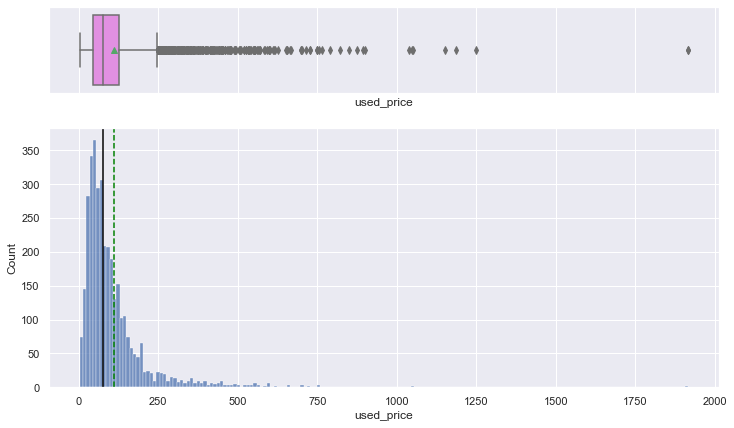

<IPython.core.display.Javascript object>

In [14]:
histogram_boxplot(usphone_df, "used_price")

In [15]:
mean_count = (
    usphone_df.groupby("brand_name")["used_price"].mean().sort_values(ascending=False)
)
print(mean_count)

brand_name
OnePlus       318.515909
Apple         293.228814
Google        239.211333
Oppo          180.845271
Huawei        176.256894
Vivo          168.190855
Xiaomi        137.465149
Honor         132.285932
Samsung       132.083462
Meizu         126.515484
Realme        124.169024
Sony          119.886136
LG            115.853726
Motorola      107.695636
Asus          103.764921
BlackBerry    102.039091
HTC            99.626000
ZTE            93.621489
Gionee         91.881964
Others         78.492102
Coolpad        77.928182
Lenovo         77.147500
Infinix        68.979000
Acer           63.798431
Panasonic      60.302979
Nokia          59.393719
Alcatel        55.326080
Microsoft      55.316818
XOLO           47.340204
Lava           40.112778
Micromax       38.134417
Karbonn        38.069333
Spice          32.299667
Celkon         22.648378
Name: used_price, dtype: float64


<IPython.core.display.Javascript object>

**Observations**

- *Used Prices* is right skewed. There are a number of phones with high used prices.
- There are some outlier with more than 1,750 euros in used prices.  
- Mean value of used price is about 110 euros. 
- OnePlus, Apple and Google brands have the highest mean used prices with 318, 293, 239 euros respectively.
- Celkon, Spice and Karbonn have the lowest mean used prices with 22, 32, 38 euros respectively.

**Let's explore the dependent variable *Screen Sizes in Inches***

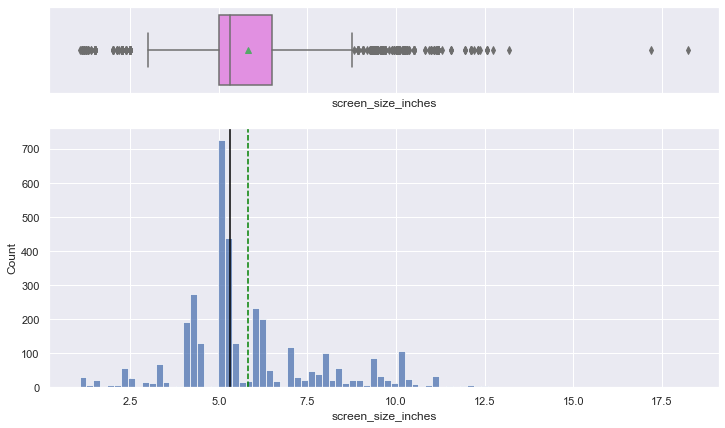

<IPython.core.display.Javascript object>

In [16]:
histogram_boxplot(usphone_df, "screen_size_inches")

In [17]:
len(usphone_df["screen_size_inches"].unique())

127

<IPython.core.display.Javascript object>

**Observations**

- Screen size in inches is slightly right skewed with lots of outliers above indicating that many phones have larges screens.
- Mean value of screen size is 5.8 inches.
- There are 127 unique screen sizes.

**Let's explore the dependent variable *Rear Camera Megapixels***

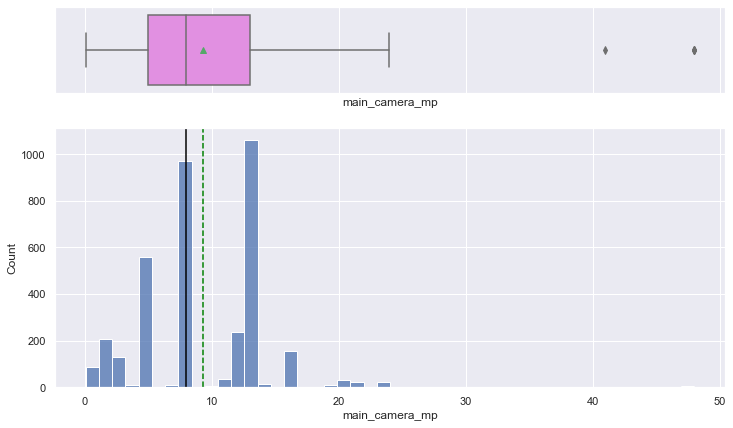

<IPython.core.display.Javascript object>

In [18]:
histogram_boxplot(usphone_df, "main_camera_mp")

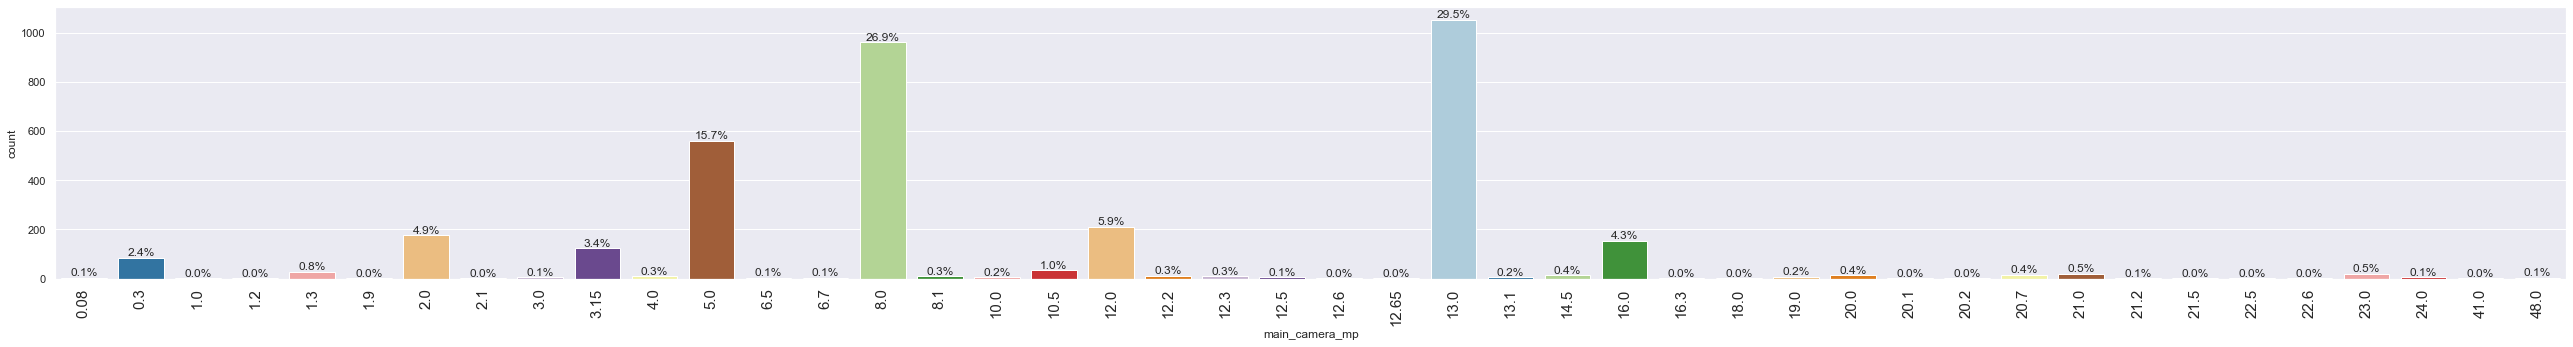

<IPython.core.display.Javascript object>

In [19]:
# Plot barplot of selfie camera mp with percentage showing on each bar
labeled_barplot(usphone_df, "main_camera_mp", perc=True)

In [20]:
len(usphone_df["main_camera_mp"].unique())

44

<IPython.core.display.Javascript object>

**Observations**

- *Rear camera megapixels* is slightly right skewed with a mean of 9.3 and outliers above 25.
- There are 44 unique types

**Let's explore the dependent variable *Front Camera Megapixels***

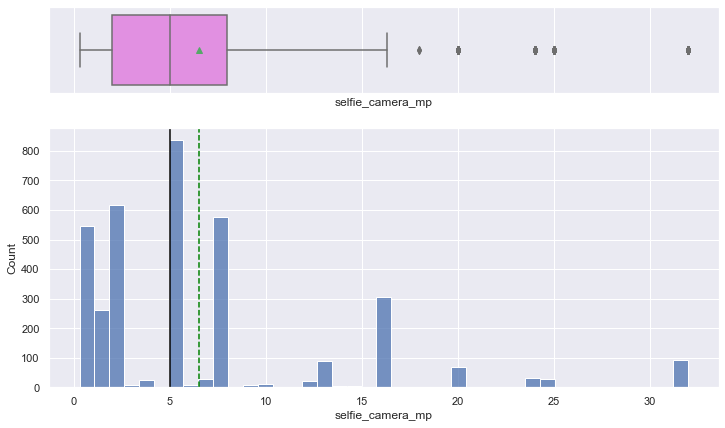

<IPython.core.display.Javascript object>

In [21]:
histogram_boxplot(usphone_df, "selfie_camera_mp")

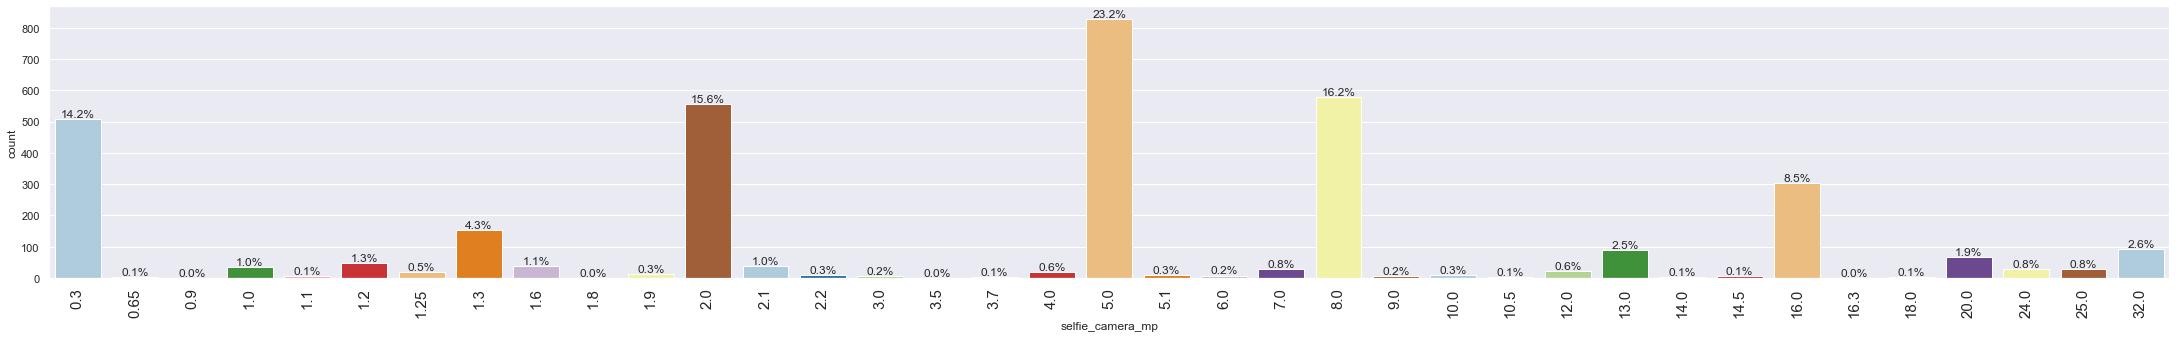

<IPython.core.display.Javascript object>

In [22]:
# Plot barplot of selfie camera mp with percentage showing on each bar
labeled_barplot(usphone_df, "selfie_camera_mp", perc=True)

In [23]:
len(usphone_df["selfie_camera_mp"].unique())

37

<IPython.core.display.Javascript object>

**Observations**

- *Selfie camera megapixels* is right skewed with a mean of 6.5 and outliers above 17.
- More cameras have high megapixels.
- There are 37 unique types.

**Let's explore the dependent variable *Internal Memory***

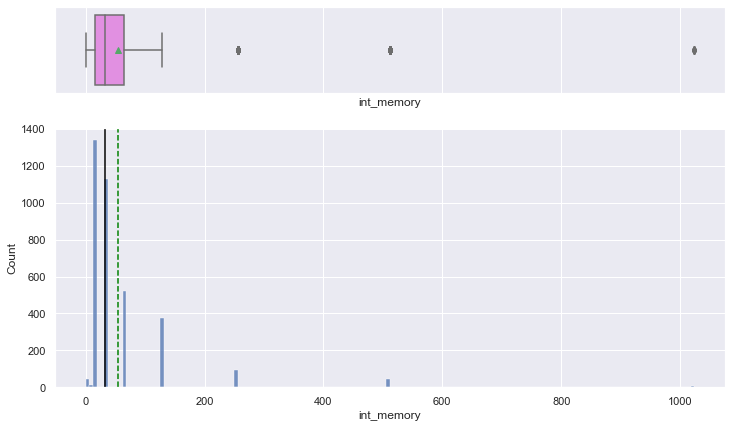

<IPython.core.display.Javascript object>

In [24]:
histogram_boxplot(usphone_df, "int_memory")

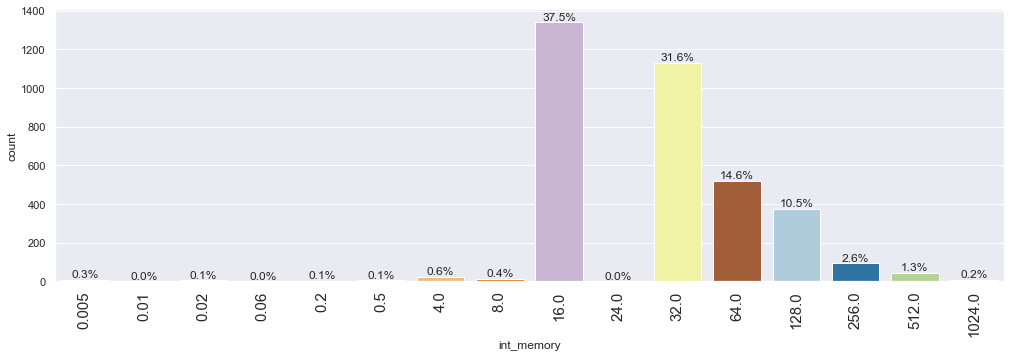

<IPython.core.display.Javascript object>

In [25]:
# Plot barplot of int_memory with percentage showing on each bar
labeled_barplot(usphone_df, "int_memory", perc=True)

**Observations**

* Internal Memory is heavily skewed to the right (many phones have high memory).
* Mean memory is 54.
* 37.5% of phones have 16 gb of internal memory, with 31.6% having 32gb

**Let's explore the dependent variable *RAM***

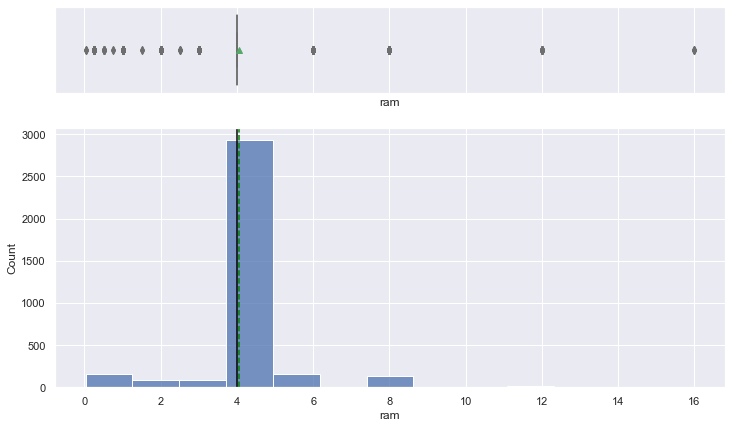

<IPython.core.display.Javascript object>

In [26]:
histogram_boxplot(usphone_df, "ram")

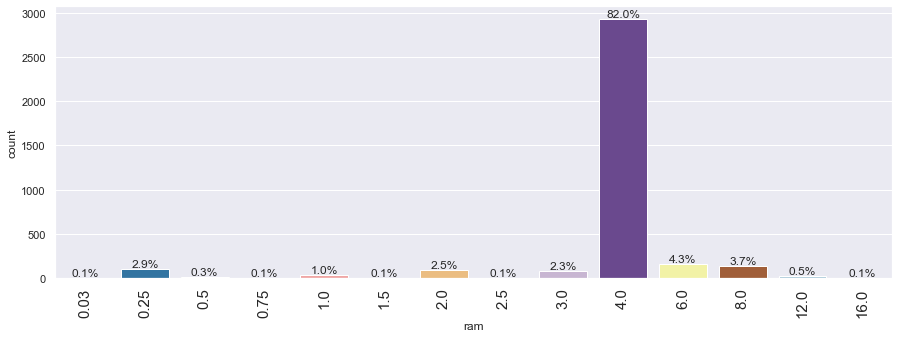

<IPython.core.display.Javascript object>

In [27]:
# Plot barplot of ram with percentage showing on each bar
labeled_barplot(usphone_df, "ram", perc=True)

**Observations**

* 82% of phones have 4gb Ram.

**Let's explore the dependent variable *Battery***

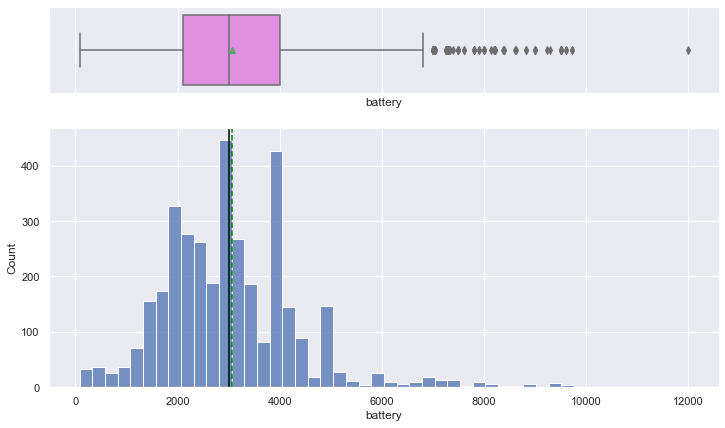

<IPython.core.display.Javascript object>

In [28]:
histogram_boxplot(usphone_df, "battery")

**Observations**

* Battery is skewed to the right, indicating that many phones have a higher battery capacity.
* Mean and Median are both around 3000 mAh

**Let's explore the dependent variable *Weight***

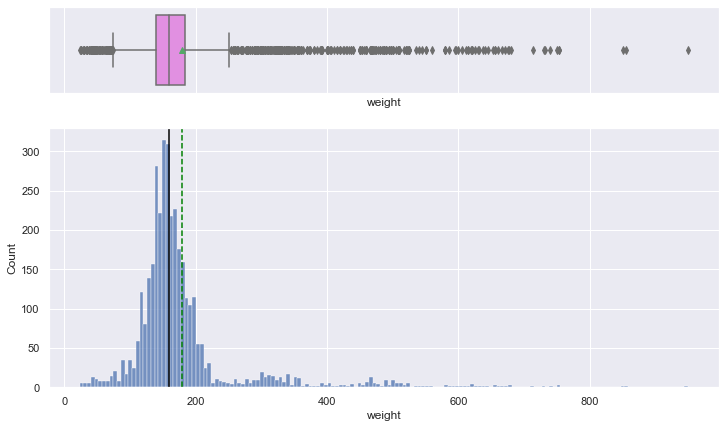

<IPython.core.display.Javascript object>

In [29]:
histogram_boxplot(usphone_df, "weight")

**Observations**

* The distribution of battery is skewed to the right.
* The outliers to the right indicate that many phones are heavier.

**Let's explore the dependent variable *Release Year***

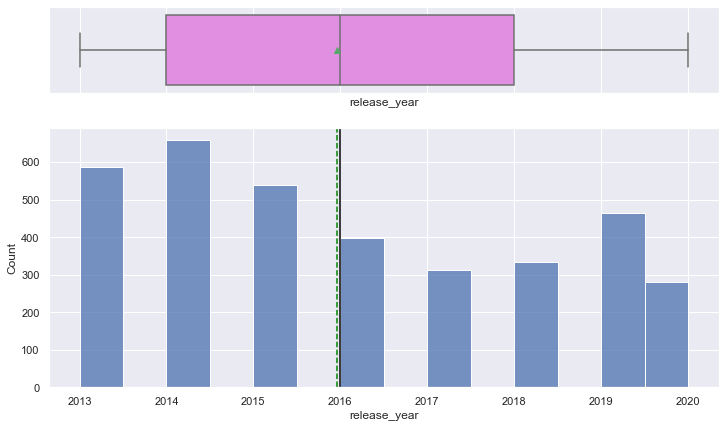

<IPython.core.display.Javascript object>

In [30]:
histogram_boxplot(usphone_df, "release_year")

**Let's explore the dependent variable *Days Used***

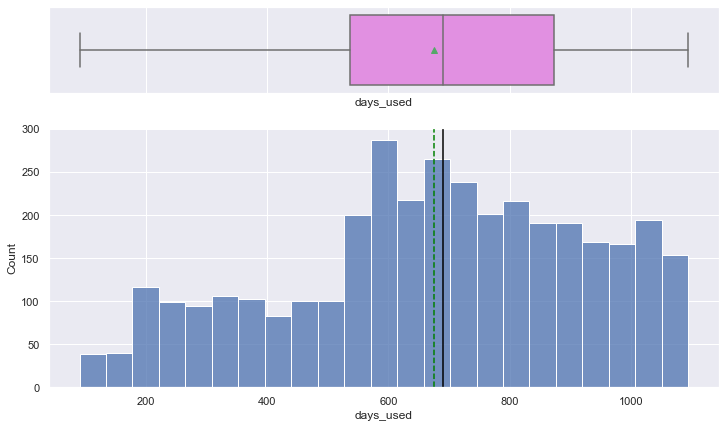

<IPython.core.display.Javascript object>

In [31]:
histogram_boxplot(usphone_df, "days_used")

**Let's explore the dependent variable *New Phone Prices***

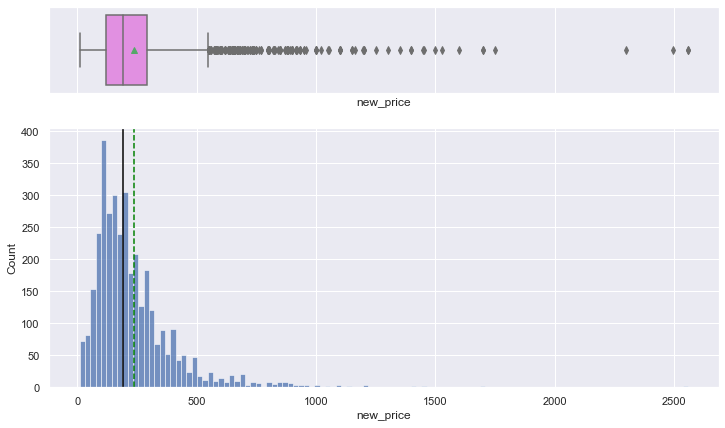

<IPython.core.display.Javascript object>

In [32]:
histogram_boxplot(usphone_df, "new_price")

**Observations**

- *New Price* is right skewed, indicating that some new phones sell for a much higher price.
- The distribution has a lot of outliers and is similar to *Used Price*
- Mean Used price is around 237 euros.

### Question 2: What percentage of the used phone market is dominated by Android devices?

**Let's explore the dependent variable *Operating Systems***

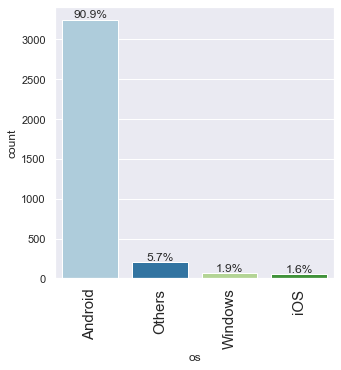

<IPython.core.display.Javascript object>

In [33]:
labeled_barplot(usphone_df, "os", perc=True)

- Android Operating system accounts for 90.9% of the market.

**Let's explore the dependent variable *Brand Names***

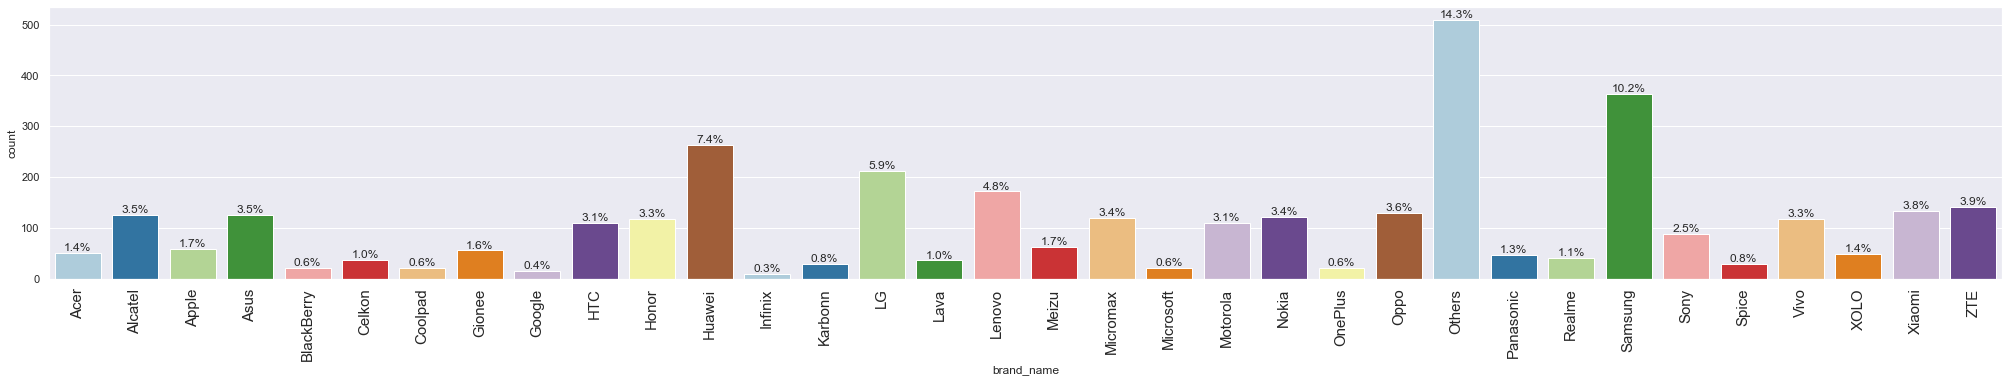

<IPython.core.display.Javascript object>

In [34]:
labeled_barplot(usphone_df, "brand_name", perc=True)

In [35]:
# returns a table count
usphone_df["brand_name"].value_counts().sort_values(ascending=False)


Others        509
Samsung       364
Huawei        264
LG            212
Lenovo        172
ZTE           141
Xiaomi        134
Oppo          129
Asus          126
Alcatel       125
Nokia         121
Micromax      120
Honor         118
Vivo          117
HTC           110
Motorola      110
Sony           88
Meizu          62
Apple          59
Gionee         56
Acer           51
XOLO           49
Panasonic      47
Realme         41
Celkon         37
Lava           36
Karbonn        30
Spice          30
Microsoft      22
OnePlus        22
Coolpad        22
BlackBerry     22
Google         15
Infinix        10
Name: brand_name, dtype: int64

<IPython.core.display.Javascript object>

- Majority of the phones (with no brand name) are labeled "Others".

**Let's explore the dependent variable *4G***

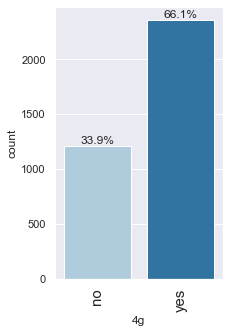

<IPython.core.display.Javascript object>

In [36]:
labeled_barplot(usphone_df, "4g", perc=True)

- More than 66% of the phones have 4g.

**Let's explore the dependent variable *5G***

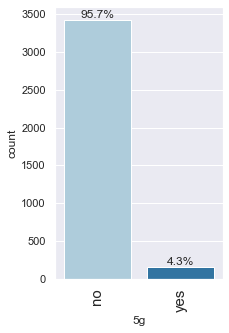

<IPython.core.display.Javascript object>

In [37]:
labeled_barplot(usphone_df, "5g", perc=True)

- More than 95% of the phones not not have 5g.

### Bivariate Analysis

### Question 3: The amount of RAM is important for the smooth functioning of a phone. How does the amount of RAM vary with the brand?

In [38]:
# Let's explore the mean of Ram for all brand names

usphone_df_ram = (
    usphone_df.groupby("brand_name")["ram"].mean().sort_values(ascending=False)
)
print(usphone_df_ram.head(5))  # Print out the top five brands by average ram

brand_name
OnePlus    6.363636
Oppo       4.961240
Vivo       4.756410
Huawei     4.641326
Honor      4.593220
Name: ram, dtype: float64


<IPython.core.display.Javascript object>

In [39]:
print(usphone_df_ram.tail(5))  # Print out the lowest five brands by average ram

brand_name
Alcatel    3.426000
Karbonn    3.375000
Lava       3.277778
Infinix    2.600000
Celkon     1.466216
Name: ram, dtype: float64


<IPython.core.display.Javascript object>

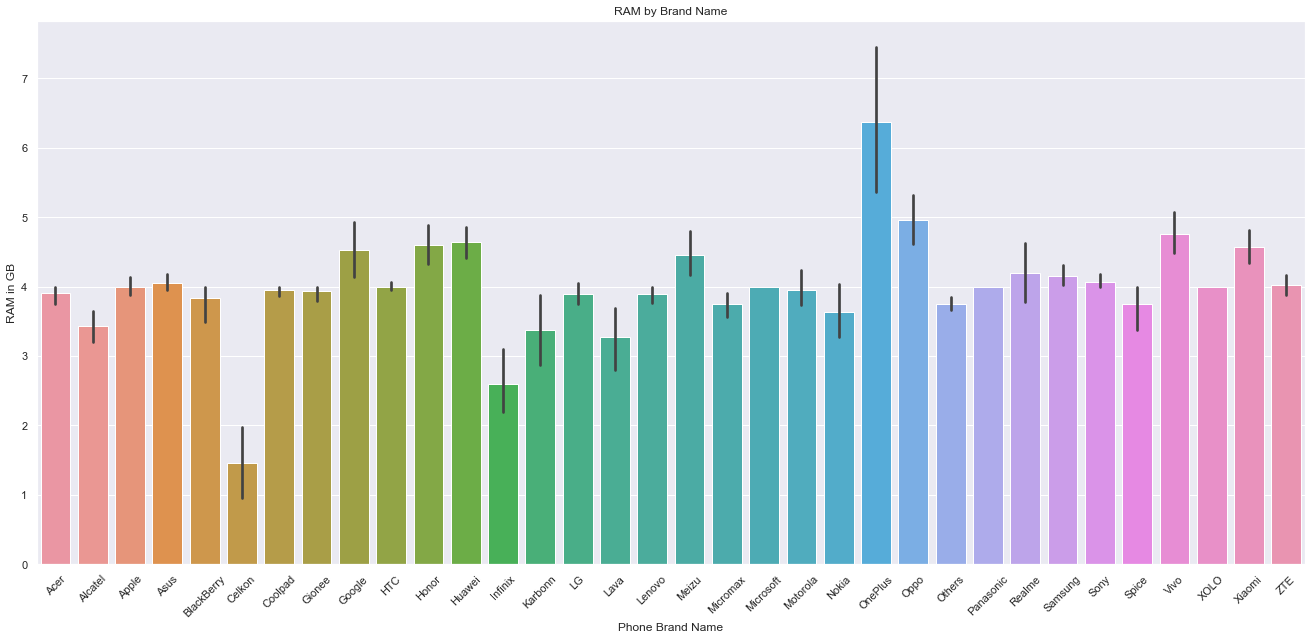

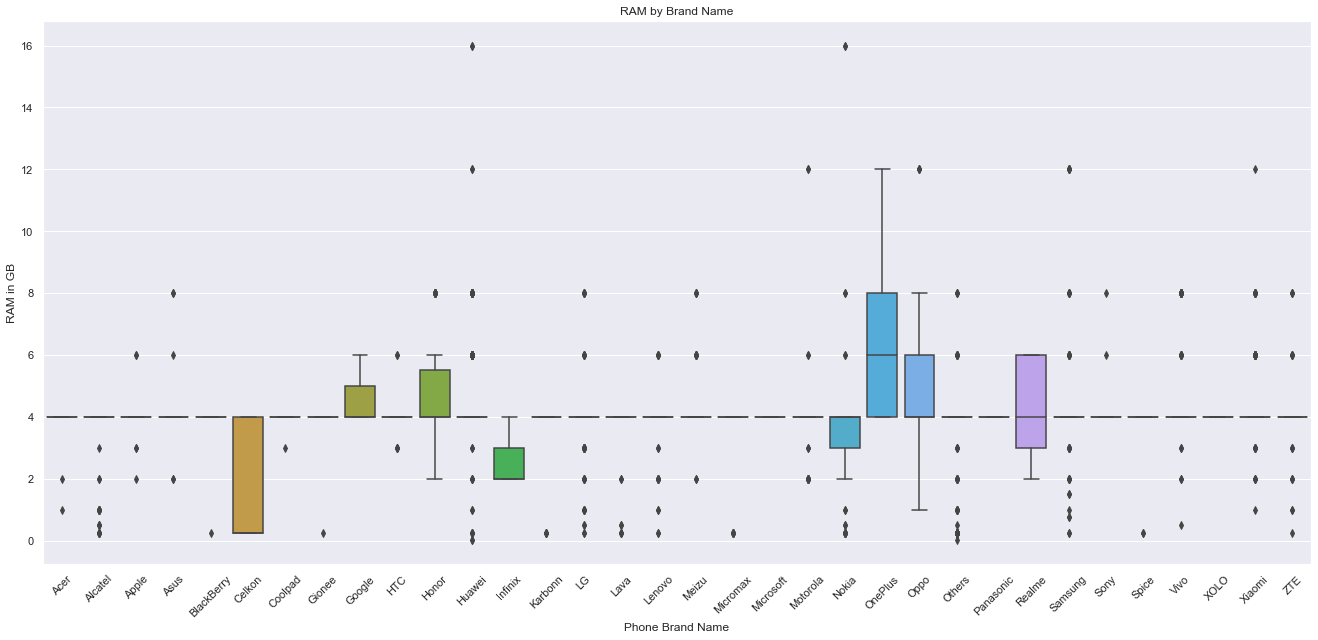

<IPython.core.display.Javascript object>

In [40]:
plt.figure(figsize=(50, 10))

plt.subplot(1, 2, 1)
ax = sns.barplot(data=usphone_df, y="ram", x="brand_name")
plt.xticks(rotation=45)
ax.set_ylabel("RAM in GB")  # sets the y-axis label
ax.set_xlabel("Phone Brand Name")  # sets the x-axis label
ax.set_title("RAM by Brand Name")  # sets the title
plt.show()

plt.figure(figsize=(50, 10))
plt.subplot(1, 2, 2)
ax = sns.boxplot(data=usphone_df, y="ram", x="brand_name")
plt.xticks(rotation=45)
ax.set_ylabel("RAM in GB")  # sets the y-axis label
ax.set_xlabel("Phone Brand Name")  # sets the x-axis label
ax.set_title("RAM by Brand Name")  # sets the title
plt.show()

**Observations**

- *OnePlus* has the highest average RAM (6.4GB) followed by *Oppo* (5GB) and *Vivo* (4.8GB).
- *Celkon* has the lowest average RAM (1.5GB) followed by *Infinix* (2.6GB) and *Lava* (3.3GB).
- *Huawei* and Nokia have the outliers with RAM of 16GB. 
- Few brand names offer phones with only 4GB RAM with no outliers (Microsoft, Panasonic and XOLO).
- All brand names offer phones with 4GB RAM.

### Question 4: A large battery often increases a phone's weight, making it feel uncomfortable in the hands. How does the weight vary for phones offering large batteries (more than 4500 mAh)?

In [41]:
battery_over4500 = usphone_df[usphone_df["battery"] > 4500]
battery_over4500.groupby("brand_name")["weight"].mean().sort_values(ascending=False)

brand_name
Google        517.000000
Lenovo        460.213793
Sony          439.500000
HTC           425.000000
Apple         397.747368
Huawei        394.486486
Others        390.546341
Samsung       384.723077
Alcatel       380.000000
LG            366.058333
Acer          360.000000
Nokia         318.000000
Asus          313.772727
Honor         248.714286
Xiaomi        231.500000
Gionee        209.430000
Motorola      200.757143
Realme        196.833333
Vivo          195.630769
ZTE           195.400000
Oppo          195.000000
Infinix       193.000000
Panasonic     182.000000
Spice         158.000000
Micromax      118.000000
BlackBerry           NaN
Celkon               NaN
Coolpad              NaN
Karbonn              NaN
Lava                 NaN
Meizu                NaN
Microsoft            NaN
OnePlus              NaN
XOLO                 NaN
Name: weight, dtype: float64

<IPython.core.display.Javascript object>

In [42]:
# Let's bin the battery size
binned_battery = pd.cut(
    battery_over4500["battery"],
    [-np.inf, 4500, 5500, 6500, 7500, 8500, 9500, 10500, 11500, 12500, np.inf],
    labels=[
        "Under 4,500",
        "4,500 to 5,500",
        "5,500 to 6,500",
        "6,500 to 7,500",
        "7,500 to 8,500",
        "8,500 to 9,500",
        "9,500 to 10,500",
        "10,500 to 11,500",
        "11,500 to 12,500",
        "Over 12,500",
    ],
)
binned_battery.value_counts()

4,500 to 5,500      206
6,500 to 7,500       54
5,500 to 6,500       45
7,500 to 8,500       21
8,500 to 9,500       15
9,500 to 10,500       4
11,500 to 12,500      1
Under 4,500           0
10,500 to 11,500      0
Over 12,500           0
Name: battery, dtype: int64

<IPython.core.display.Javascript object>

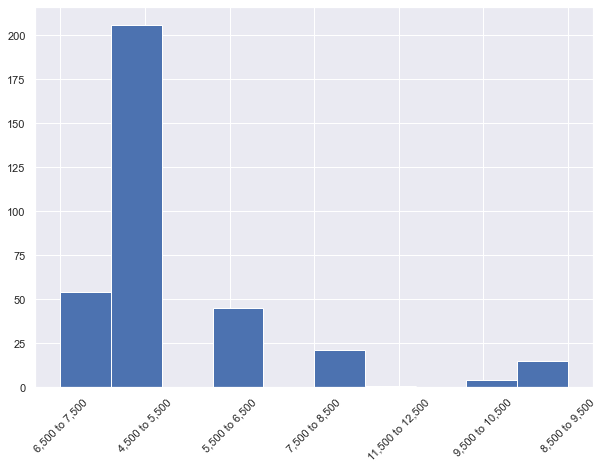

<IPython.core.display.Javascript object>

In [43]:
# Let's plot the binned battery size
plt.figure(figsize=(10, 7))

import matplotlib.pyplot as plt

plt.hist(binned_battery)
plt.xticks(rotation=45)

plt.show()

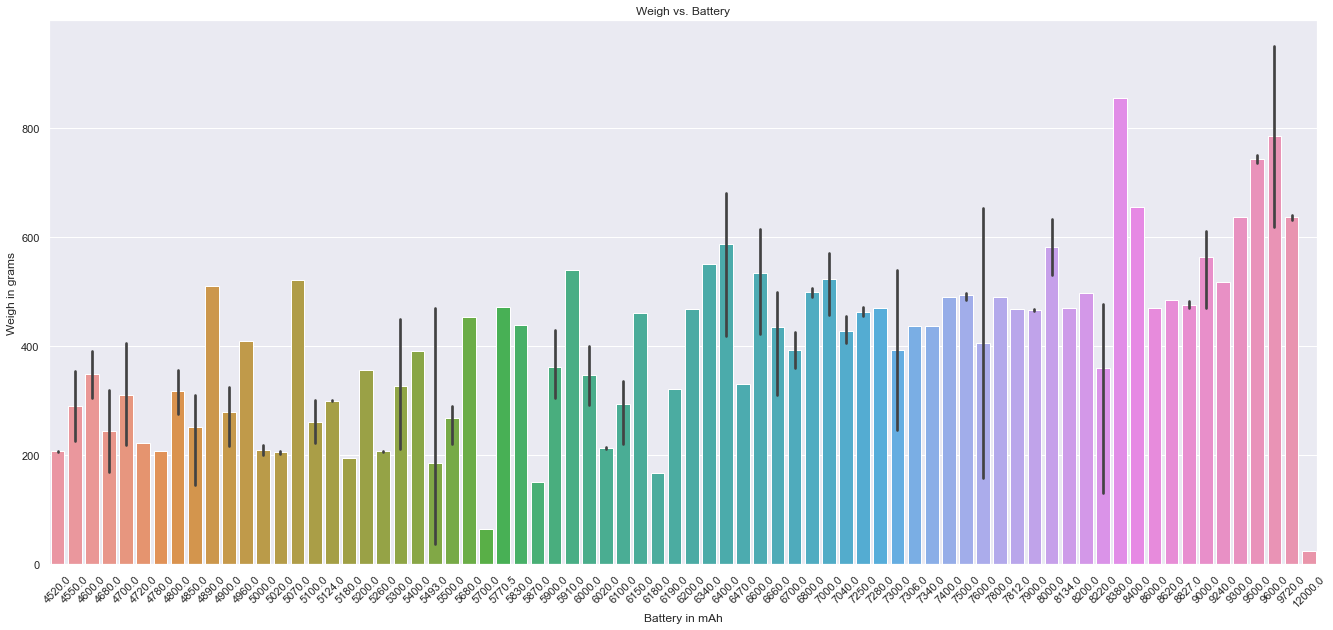

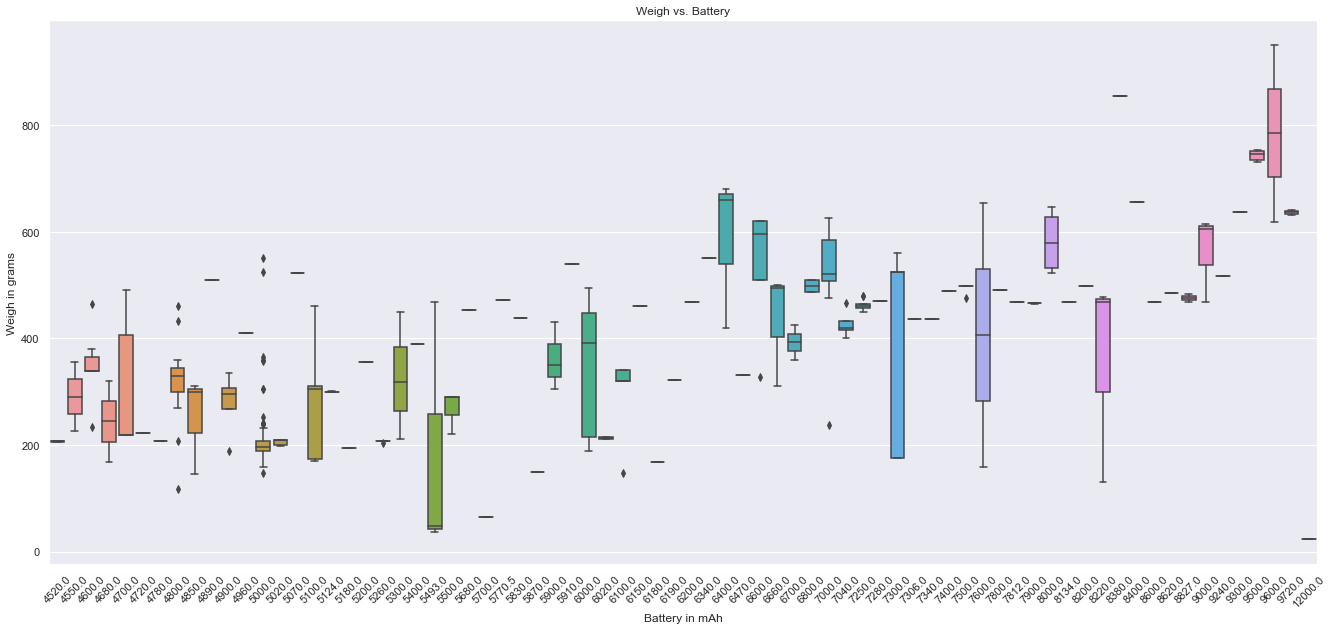

<IPython.core.display.Javascript object>

In [44]:
plt.figure(figsize=(50, 10))

plt.subplot(1, 2, 1)
ax = sns.barplot(data=battery_over4500, y="weight", x="battery")
plt.xticks(rotation=45)
ax.set_ylabel("Weigh in grams")  # sets the y-axis label
ax.set_xlabel("Battery in mAh")  # sets the x-axis label
ax.set_title("Weigh vs. Battery")  # sets the title
plt.show()

plt.figure(figsize=(50, 10))
plt.subplot(1, 2, 2)
ax = sns.boxplot(data=battery_over4500, y="weight", x="battery")
plt.xticks(rotation=45)
ax.set_ylabel("Weigh in grams")  # sets the y-axis label
ax.set_xlabel("Battery in mAh")  # sets the x-axis label
ax.set_title("Weigh vs. Battery")  # sets the title
plt.show()

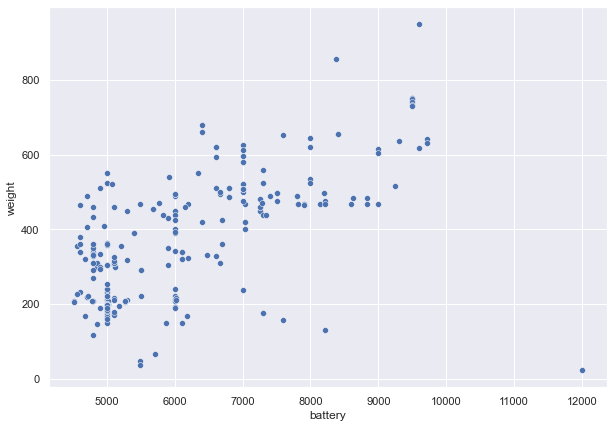

<IPython.core.display.Javascript object>

In [45]:
plt.figure(figsize=(10, 7))
sns.scatterplot(y="weight", x="battery", data=battery_over4500)
plt.show()

In [46]:
usphone_df[usphone_df["battery"] == usphone_df["battery"].max()]

,brand_name,os,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,used_price,screen_size_inches
387,Samsung,Android,yes,no,12.0,5.0,64.0,3.0,12000.0,23.0,2019,266,659.47,460.58,17.188976


<IPython.core.display.Javascript object>

**Observations**
- Battery and Weight are highly positively correlated
- Google has the highest mean weight of all brands.
- Most of the phones have battery within 4,500 to 5,500 mAh.
- Samsung has an outlier phone with the highest battery capacity (12,000 mAh) and lowest weight (3.17 grams).

### Question 5: Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones are available across different brands with a screen size larger than 6 inches? 

In [47]:
# Let's select phones with over 6 inches of screen size
screen_over6 = usphone_df[usphone_df["screen_size_inches"] > 6]
screen_over6.groupby("brand_name")["screen_size_inches"].value_counts().sort_values(
    ascending=False
)

brand_name  screen_size_inches
Others      7.000000              26
Samsung     8.000000              18
Others      8.000000              17
Lenovo      10.062992             16
Asus        7.000000              16
                                  ..
Nokia       10.251969              1
            10.374016              1
            11.188976              1
OnePlus     6.062992               1
ZTE         11.188976              1
Name: screen_size_inches, Length: 345, dtype: int64

<IPython.core.display.Javascript object>

In [48]:
# Let's count the phones with over 6 inches of screen size by brand.
screen_over6["brand_name"].value_counts()

Huawei        159
Samsung       128
Others        116
Honor          87
Vivo           86
Xiaomi         85
Lenovo         72
Oppo           70
LG             68
Asus           44
Motorola       44
Realme         40
Nokia          28
Alcatel        28
Meizu          25
Apple          24
ZTE            22
Acer           19
OnePlus        16
Sony           14
Micromax       11
Infinix        10
HTC             8
Gionee          7
XOLO            4
Google          4
Coolpad         3
Celkon          2
BlackBerry      2
Lava            2
Spice           2
Karbonn         2
Panasonic       2
Microsoft       1
Name: brand_name, dtype: int64

<IPython.core.display.Javascript object>

In [49]:
# Let's find the percentage of phones with over 6 inches of screen size in the total data set.
print(
    "Percentage of phones with screens above six inches:",
    round(screen_over6.shape[0] / usphone_df.shape[0] * 100, 2),
    "%",
)

Percentage of phones with screens above six inches: 34.58 %


<IPython.core.display.Javascript object>

C:\Users\Bola Ajayi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


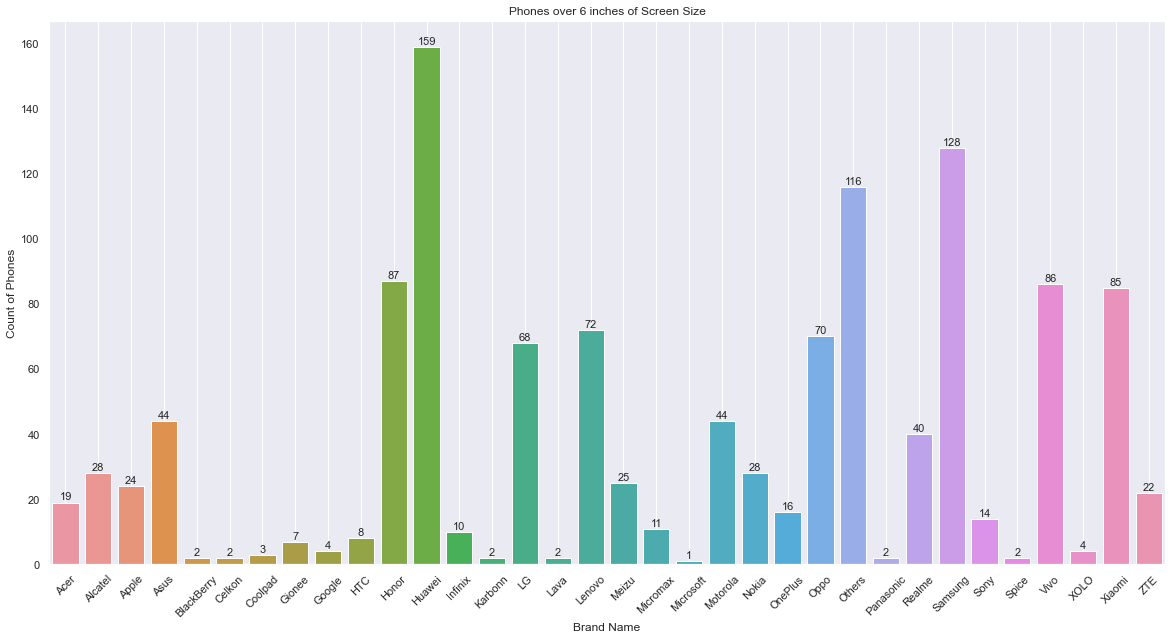

<IPython.core.display.Javascript object>

In [50]:
plt.figure(figsize=(20, 10))  # set the witdth and height of bars
ax = sns.countplot(
    screen_over6["brand_name"]
)  # plots the count of users in the group (control vs. treatment)
for rect in ax.patches:  # add the counted values on top of the bars
    ax.text(
        rect.get_x() + rect.get_width() / 2,
        rect.get_height() + 0.75,
        rect.get_height(),
        horizontalalignment="center",
        fontsize=11,
    )
plt.xticks(rotation=45)
ax.set_ylabel("Count of Phones")  # sets the y-axis label
ax.set_xlabel("Brand Name")  # sets the x-axis label
ax.set_title("Phones over 6 inches of Screen Size")  # sets the title
plt.grid()
plt.show()

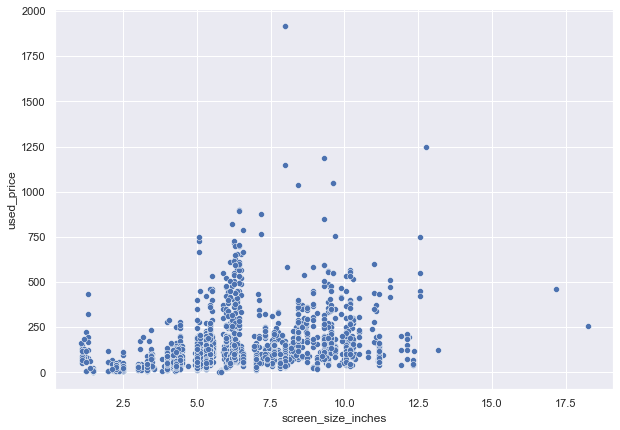

<IPython.core.display.Javascript object>

In [51]:
# Let's plot a scatter diagram
plt.figure(figsize=(10, 7))
sns.scatterplot(y="used_price", x="screen_size_inches", data=usphone_df)
plt.show()

**Observations**

- There are 1,235 phones with screen size greater than 6 inches and these account for approximately 35% of all used phones.
- Huawei has the most phones with over 6 inches of screen in this population. This is approximately 13% of dataset.

### Question 6: Budget phones nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of budget phones offering greater than 8MP selfie cameras across brands?

In [52]:
# Let's get phones with selfie cameras greater than 8 megapixels
Selfie_over8mp = usphone_df[usphone_df["selfie_camera_mp"] > 8]

Selfie_over8mp.groupby("brand_name")["selfie_camera_mp"].mean().sort_values(
    ascending=False
)

brand_name
Oppo          22.120000
Honor         20.802326
Huawei        20.670330
Lenovo        20.142857
Xiaomi        19.338462
Nokia         18.900000
Motorola      18.692308
Vivo          18.564103
Meizu         18.541667
Samsung       18.183333
Realme        17.166667
Others        16.450000
Gionee        16.250000
Infinix       16.000000
OnePlus       16.000000
BlackBerry    16.000000
LG            15.937500
ZTE           15.450000
Asus          15.333333
Panasonic     14.500000
HTC           14.100000
Coolpad       14.000000
Sony          13.428571
Acer          13.000000
Micromax      13.000000
Alcatel             NaN
Apple               NaN
Celkon              NaN
Google              NaN
Karbonn             NaN
Lava                NaN
Microsoft           NaN
Spice               NaN
XOLO                NaN
Name: selfie_camera_mp, dtype: float64

<IPython.core.display.Javascript object>

In [53]:
Selfie_over8mp.shape[0]

666

<IPython.core.display.Javascript object>

In [54]:
# Calculate percentage of selfie cameras with more than 8mp in the dataset
percentage = (Selfie_over8mp.shape[0] / usphone_df.shape[0]) * 100
print("Percentage of selfie cameras with more than 8mp:", round(percentage, 2), "%")

Percentage of selfie cameras with more than 8mp: 18.65 %


<IPython.core.display.Javascript object>

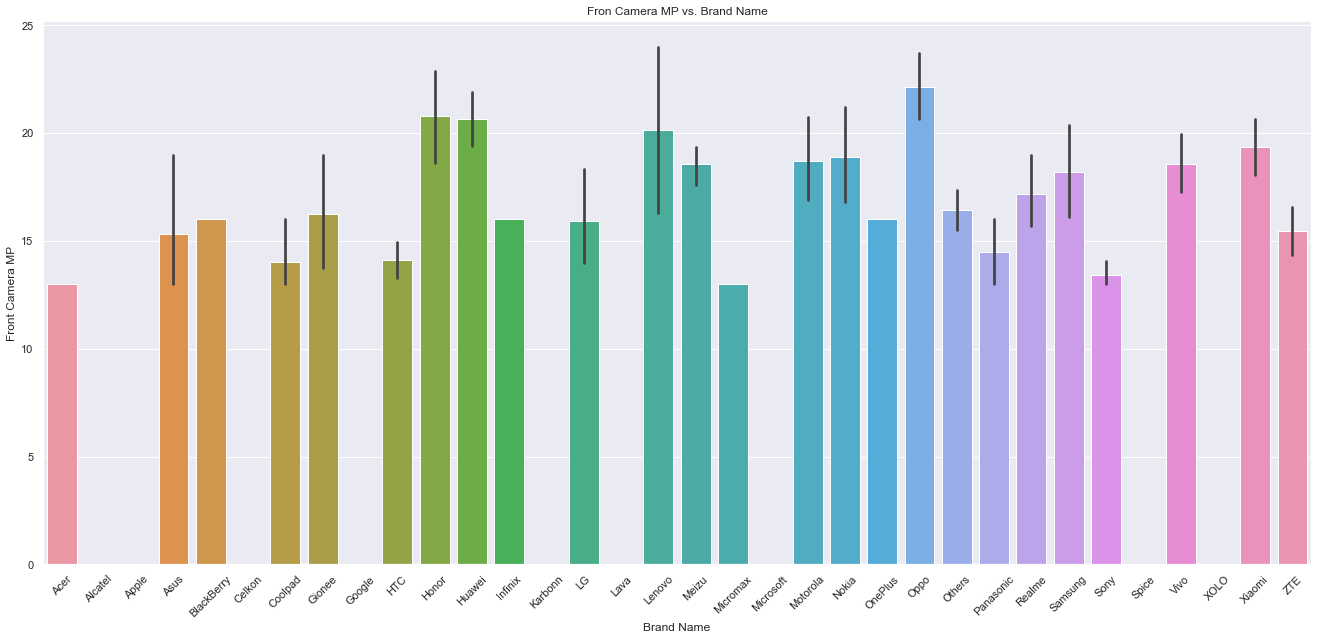

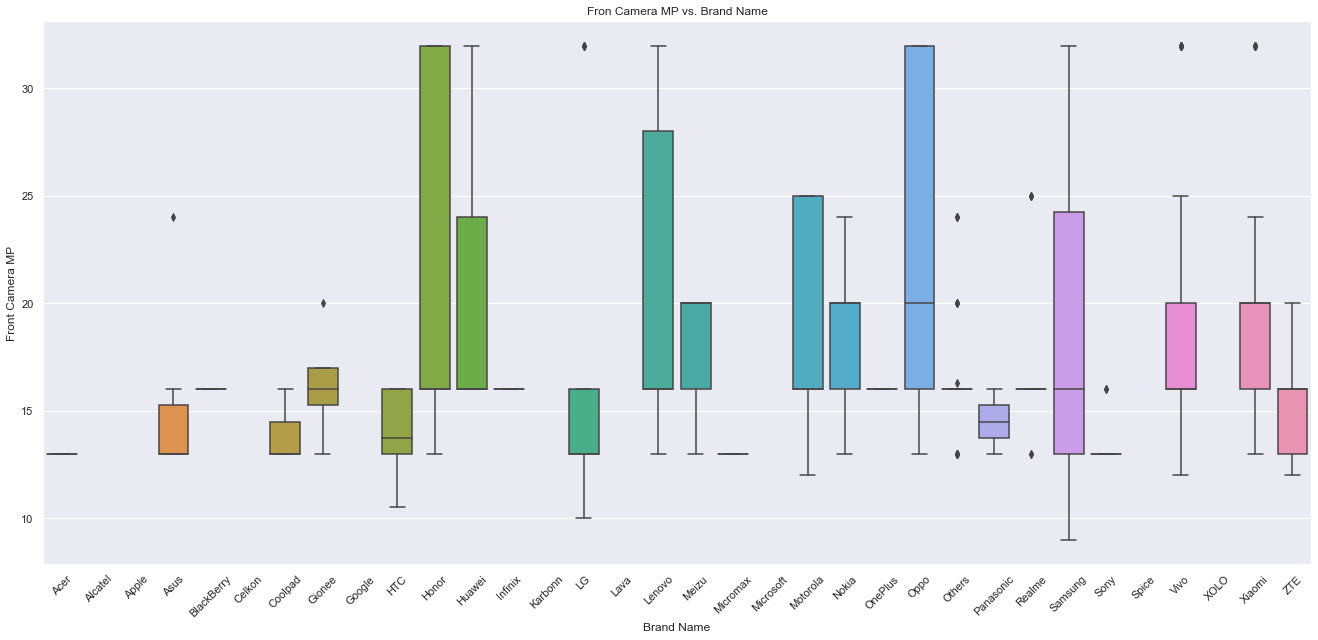

<IPython.core.display.Javascript object>

In [55]:
plt.figure(figsize=(50, 10))

plt.subplot(1, 2, 1)
ax = sns.barplot(data=Selfie_over8mp, y="selfie_camera_mp", x="brand_name")
plt.xticks(rotation=45)
ax.set_ylabel("Front Camera MP")  # sets the y-axis label
ax.set_xlabel("Brand Name")  # sets the x-axis label
ax.set_title("Fron Camera MP vs. Brand Name")  # sets the title
plt.show()

plt.figure(figsize=(50, 10))
plt.subplot(1, 2, 2)
ax = sns.boxplot(data=Selfie_over8mp, y="selfie_camera_mp", x="brand_name")
plt.xticks(rotation=45)
ax.set_ylabel("Front Camera MP")  # sets the y-axis label
ax.set_xlabel("Brand Name")  # sets the x-axis label
ax.set_title("Fron Camera MP vs. Brand Name")  # sets the title
plt.show()

**Observations**

- There are 666 phones with Selfie cameras with more than 8 megapixels and these account for approximately 19% of all used phones.
- Oppo, Honor and Huawei are the brands with the highest average megapixels respectively with 22.1, 20.8 and 20.7 megapixes respectively.

### Question 7: Which attributes are highly correlated with the used phone price?

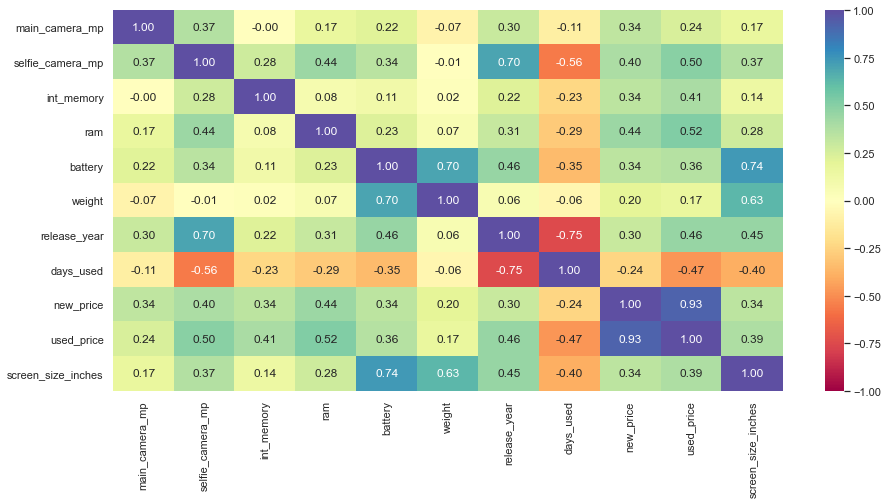

<IPython.core.display.Javascript object>

In [56]:
numeric_columns = usphone_df.select_dtypes(include=np.number).columns.tolist()
# numeric_columns.remove("release_year")  # dropping year column as it is temporal variable

# correlation heatmap
plt.figure(figsize=(15, 7))
sns.heatmap(
    usphone_df[numeric_columns].corr(),
    annot=True,
    vmin=-1,
    vmax=1,
    fmt=".2f",
    cmap="Spectral",
)
plt.show()

**Observations**

* *Used Price* is negatively correlated with *Days Used*. The more days used, the lower the used price.

* *Used Price* is highly positively correlated with *New Price*. Phones that costs more new and will most likely fetch higher resale price.

* *Used Price* is also positively correlated to all other variables (besides days used), with the top 3 being: *RAM*, *Selfie Camera mp* and *Release Year*.  Higher RAM and Megapixels will fetch higher used resale price.

* *Battery* is positively correlated with *Screen Size* and *Weight*. Larger battery capacity is needed to support a larger screen size and larger battery weighs more.

* *Release Year* is positively correlated with the mp of the *selfie camera*. Newer camera has more megapixels for the selfie camera.

**Let's look at the graphs of a few variables that are highly correlated with *Used Phone Price*.**

***Used Phone Price * vs *New Phone Price****

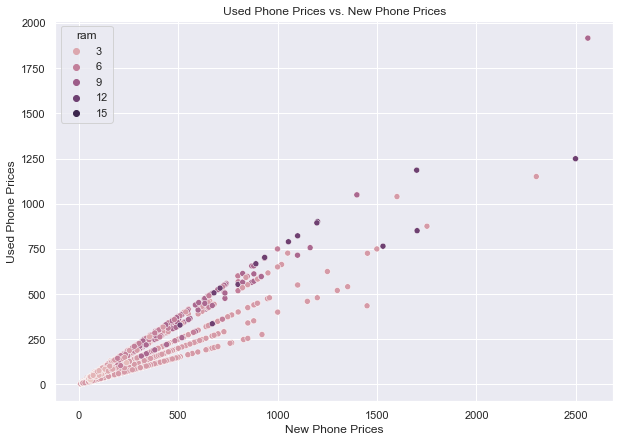

<IPython.core.display.Javascript object>

In [57]:
plt.figure(figsize=(10, 7))
ax = sns.scatterplot(y="used_price", x="new_price", data=usphone_df, hue="ram")
ax.set_ylabel("Used Phone Prices")  # sets the y-axis label
ax.set_xlabel("New Phone Prices")  # sets the x-axis label
ax.set_title("Used Phone Prices vs. New Phone Prices")  # sets the title
plt.show()

 - The higher the price of new phones, the higher the resale value.
 - Lower RAM phones are relatively cheaper than higher ram phones.

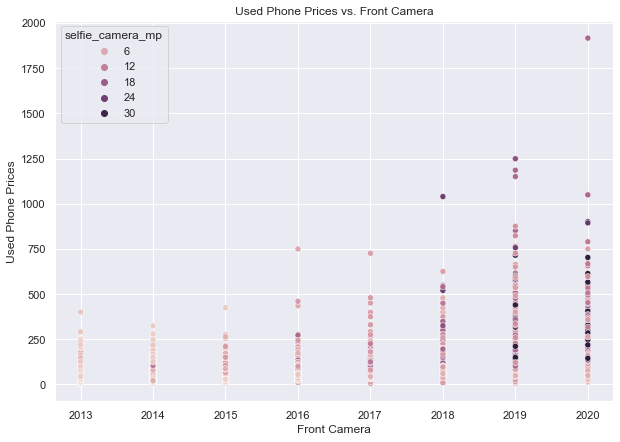

<IPython.core.display.Javascript object>

In [58]:
plt.figure(figsize=(10, 7))
ax = sns.scatterplot(
    y="used_price", x="release_year", data=usphone_df, hue="selfie_camera_mp"
)
ax.set_ylabel("Used Phone Prices")  # sets the y-axis label
ax.set_xlabel("Front Camera")  # sets the x-axis label
ax.set_title("Used Phone Prices vs. Front Camera")  # sets the title
plt.show()

- Phones with older release year have lower used prices and mostly smaller selfie camera MP.

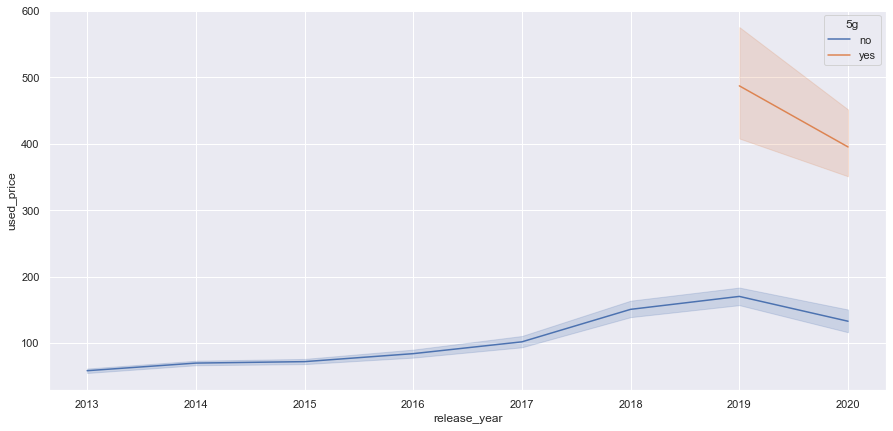

<IPython.core.display.Javascript object>

In [59]:
plt.figure(figsize=(15, 7))
sns.lineplot(y="used_price", x="release_year", data=usphone_df, hue="5g")
plt.show()

- 5g phones started in 2020 at a higher resale value.

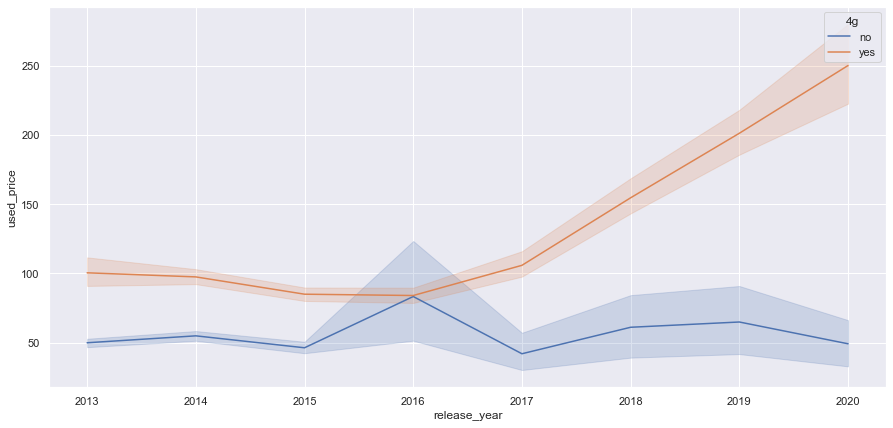

<IPython.core.display.Javascript object>

In [60]:
plt.figure(figsize=(15, 7))
sns.lineplot(y="used_price", x="release_year", data=usphone_df, hue="4g")
plt.show()

- Recently released phones (with recent years) have higher used prices especially when they have 4g

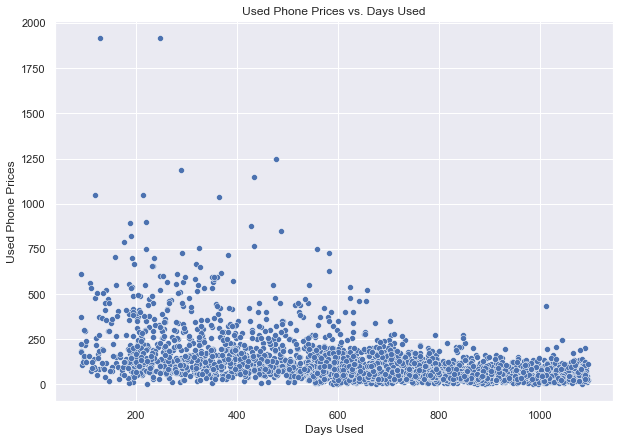

<IPython.core.display.Javascript object>

In [61]:
plt.figure(figsize=(10, 7))
ax = sns.scatterplot(y="used_price", x="days_used", data=usphone_df)
ax.set_ylabel("Used Phone Prices")  # sets the y-axis label
ax.set_xlabel("Days Used")  # sets the x-axis label
ax.set_title("Used Phone Prices vs. Days Used")  # sets the title
plt.show()

- Price decreased as the number of days used increases.

### Feature Engineering -  Log transformation

Some features are very skewed and will likely behave better on the log scale.

Let's transform both *New Price*, *Used Price* and *Weight*

### Log Transformation

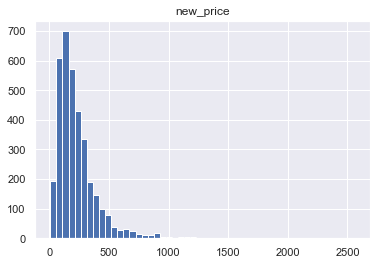

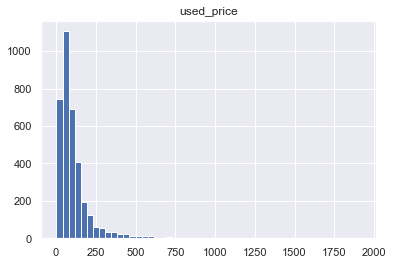

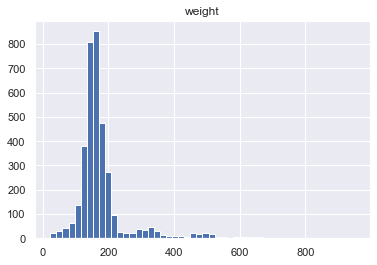

<IPython.core.display.Javascript object>

In [62]:
# Based on univariate analysis, we can say that variables shown below are skewed and will likely behave better on the log scale.
cols_to_log = ["new_price", "used_price", "weight"]
for colname in cols_to_log:
    plt.hist(usphone_df[colname], bins=50)
    plt.title(colname)
    plt.show()

In [63]:
# Log transformation
for colname in cols_to_log:
    usphone_df[colname + "_log"] = np.log(usphone_df[colname] + 1)
usphone_df.drop(cols_to_log, axis=1, inplace=True)

<IPython.core.display.Javascript object>

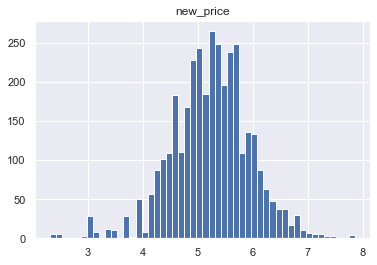

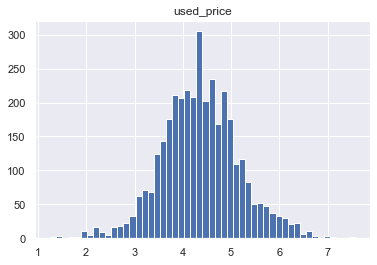

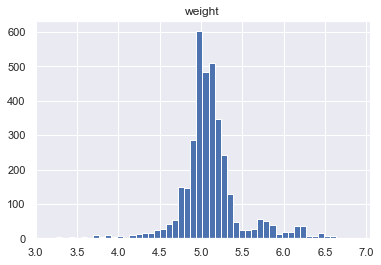

<IPython.core.display.Javascript object>

In [64]:
# Based on univariate analysis, we can say that variables shown below are skewed and will likely behave better on the log scale.

for colname in cols_to_log:
    plt.hist(usphone_df[colname + "_log"], bins=50)
    plt.title(colname)
    plt.show()

**Observations**

- The log transformed variables are now almost normally distributed. 

### Outlier Detection

- Let's look at outliers in every numerical column

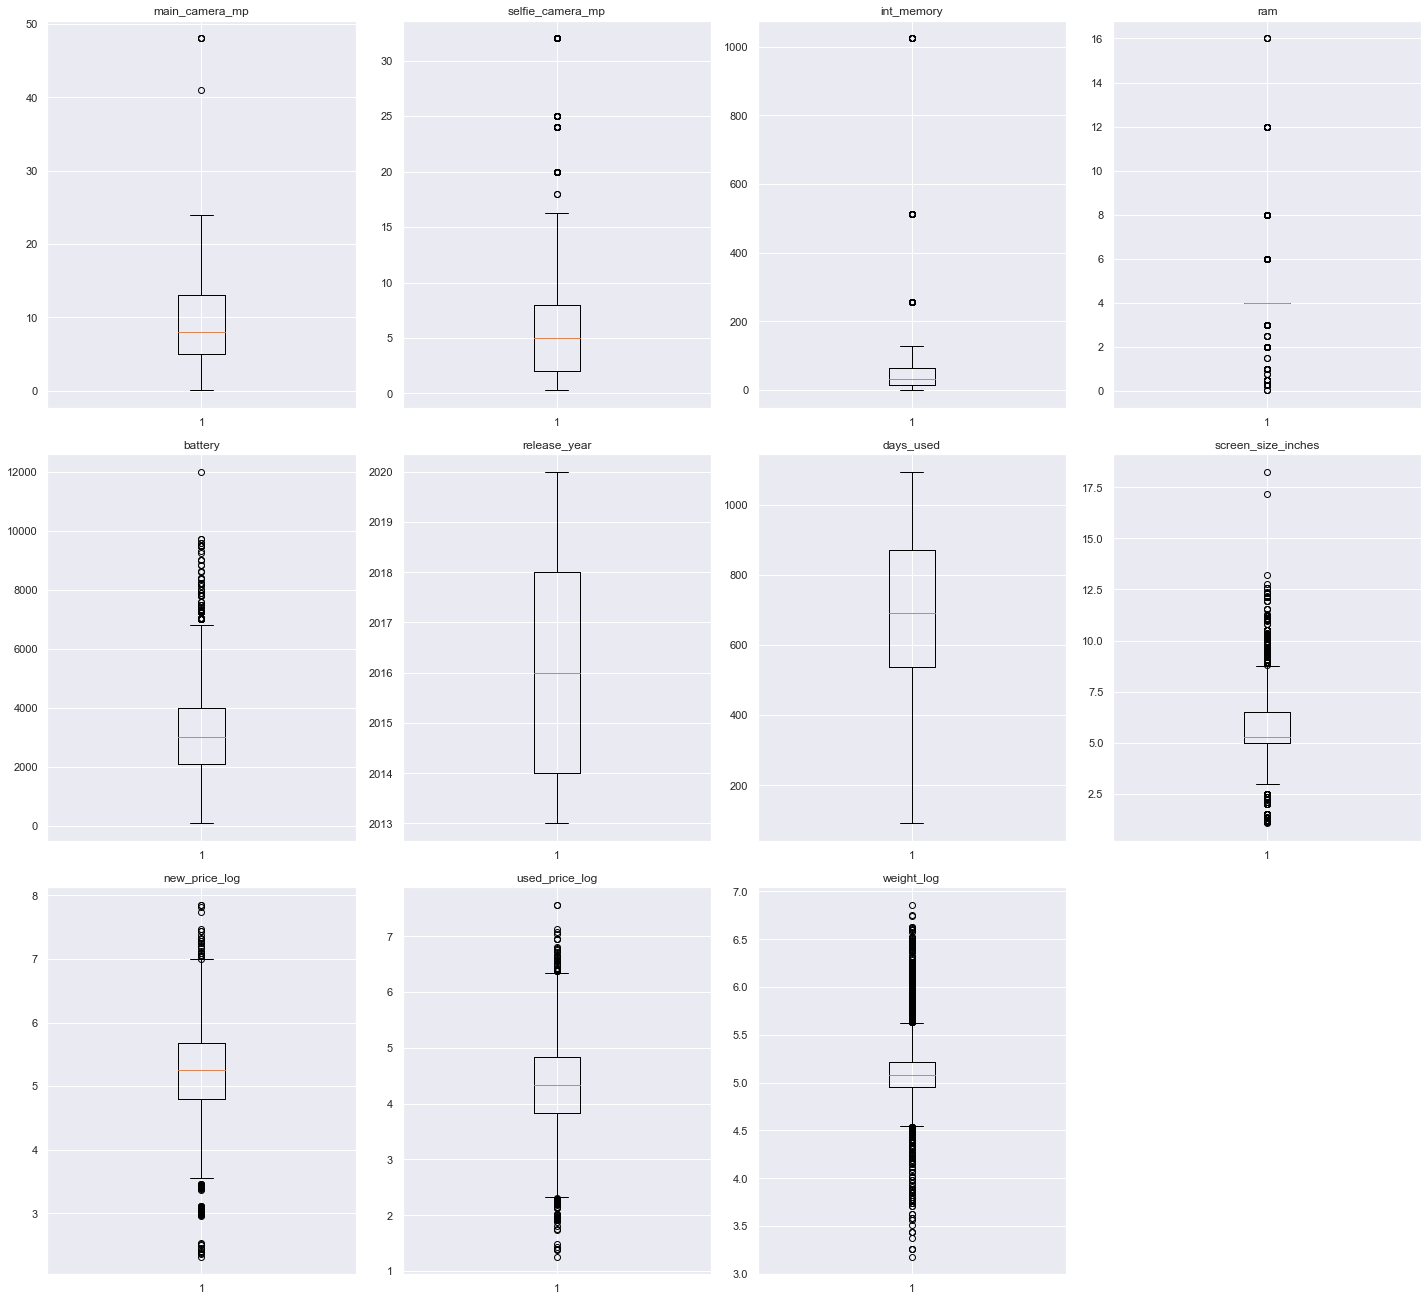

<IPython.core.display.Javascript object>

In [65]:
# let's plot the boxplots of all columns to check for outliers
plt.figure(figsize=(20, 30))

for i, variable in enumerate(
    usphone_df.select_dtypes(include=np.number).columns.tolist()
):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(usphone_df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

**Observations**

* Only *Release Year* and *Days Used* variables have no outliers while all the other variables have outliers.
* If we treat these outliers, we would loose valuable information. Therefore, they would be left untreated.

### EDA

- It is a good idea to explore the data once again after manipulating it.

In [66]:
usphone_df.sample(n=10, random_state=1)

,brand_name,os,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,release_year,days_used,screen_size_inches,new_price_log,used_price_log,weight_log
2501,Samsung,Android,yes,no,13.0,13.0,32.0,4.00,3600.0,2017,683,5.311024,5.296716,4.387884,5.204007
2782,Sony,Android,yes,no,8.0,8.0,32.0,4.00,3300.0,2019,195,5.437008,5.294058,5.011302,5.056246
605,Others,Android,yes,no,8.0,5.0,16.0,4.00,2400.0,2015,1048,5.000000,5.090493,3.899748,4.927254
2923,Vivo,Android,yes,no,13.0,16.0,64.0,4.00,3260.0,2019,375,7.625984,5.360729,4.936702,5.012633
941,Others,Others,no,no,0.3,0.3,32.0,0.25,820.0,2013,883,2.251969,3.427839,2.294553,4.510860
1833,LG,Android,no,no,8.0,1.3,32.0,4.00,3140.0,2013,670,5.311024,5.487035,4.576565,5.087596
671,Apple,iOS,yes,no,12.0,7.0,64.0,4.00,5493.0,2018,403,5.874016,6.552722,5.861014,3.891820
1796,LG,Android,yes,no,5.0,0.3,16.0,4.00,4000.0,2014,708,7.000000,5.248602,4.343026,5.689684
757,Asus,Android,yes,no,13.0,8.0,32.0,4.00,5000.0,2017,612,5.311024,5.603962,4.692540,5.204007
3528,Realme,Android,yes,no,8.0,16.0,64.0,4.00,4035.0,2019,433,6.188976,5.080690,4.394449,5.220356


<IPython.core.display.Javascript object>

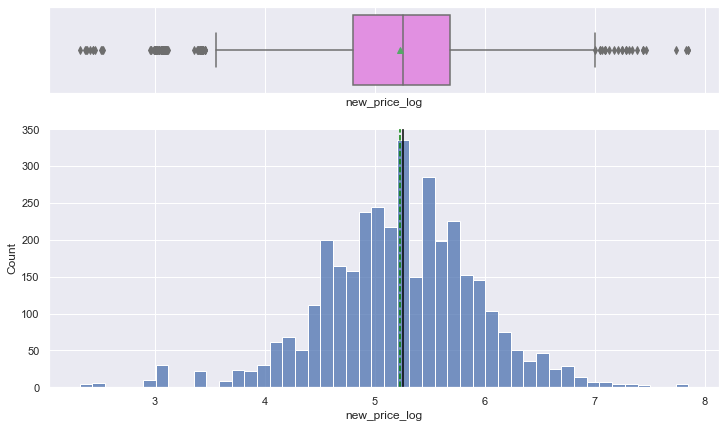

<IPython.core.display.Javascript object>

In [67]:
histogram_boxplot(usphone_df, "new_price_log")

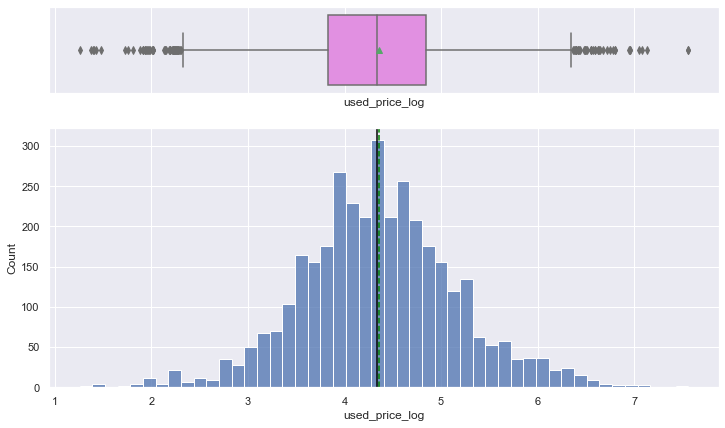

<IPython.core.display.Javascript object>

In [68]:
histogram_boxplot(usphone_df, "used_price_log")

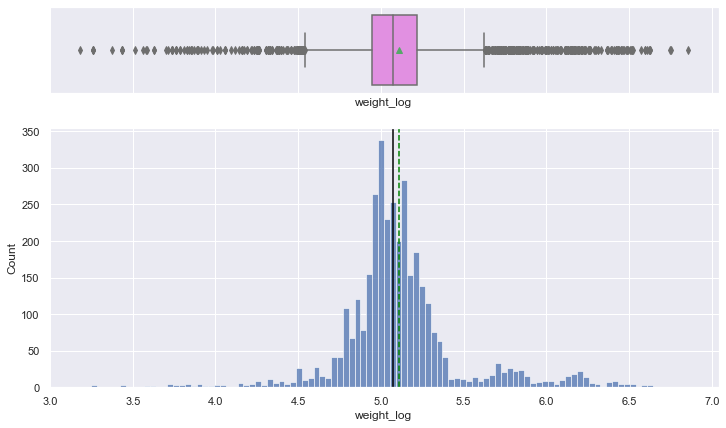

<IPython.core.display.Javascript object>

In [69]:
histogram_boxplot(usphone_df, "weight_log")

**Observations**

* For the three variables (used price, new prices and weight), we can see that they are normally distributed and we retained their outliers for information purposes.

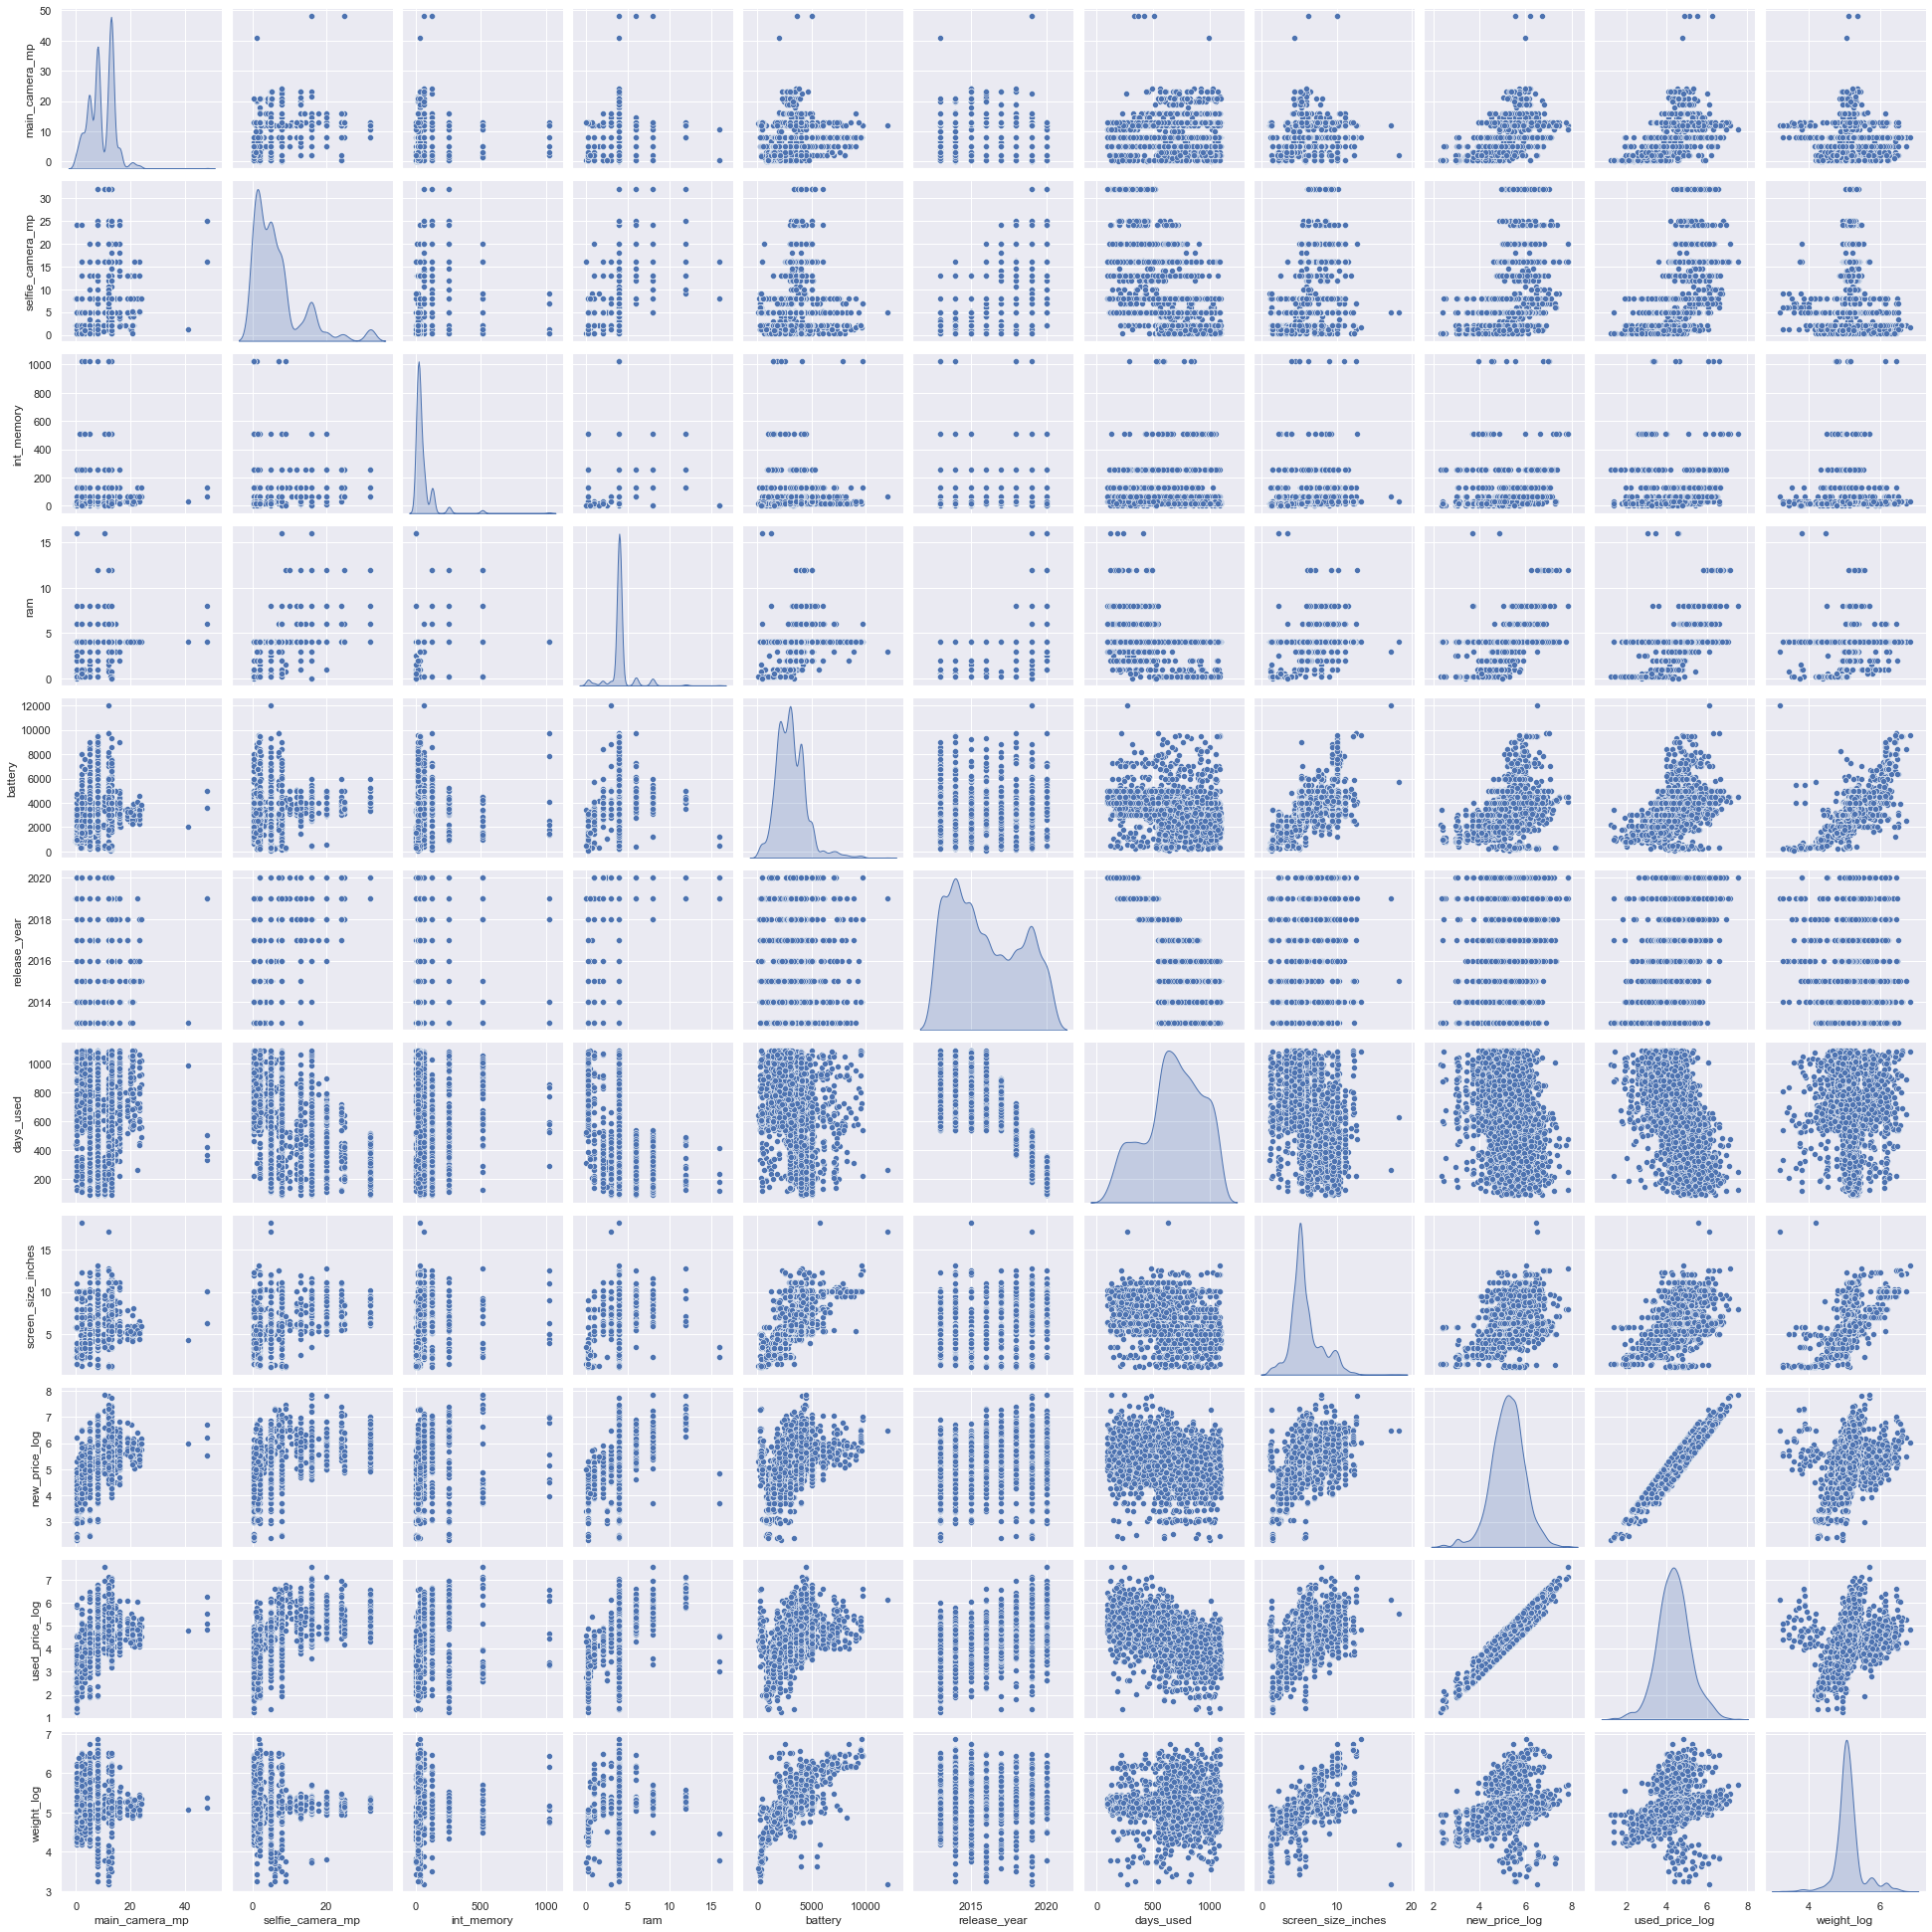

<IPython.core.display.Javascript object>

In [70]:
sns.pairplot(usphone_df, diag_kind="kde")

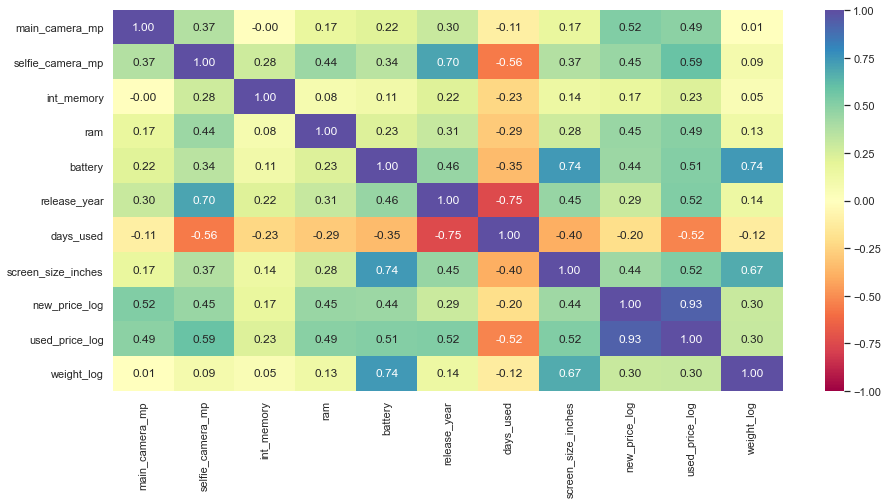

<IPython.core.display.Javascript object>

In [71]:
numeric_columns = usphone_df.select_dtypes(include=np.number).columns.tolist()
# numeric_columns.remove("release_year")  # dropping year column as it is temporal variable

# correlation heatmap
plt.figure(figsize=(15, 7))
sns.heatmap(
    usphone_df[numeric_columns].corr(),
    annot=True,
    vmin=-1,
    vmax=1,
    fmt=".2f",
    cmap="Spectral",
)
plt.show()

**Observations**

#### Used prices correlation with other variables changed:

* Used prices is still highly correlated with new price of phones
* and moderately correlated with screen size, release year, battery, ram, and camera mp (main and selfie).
* and negatively correlated with days used.

## Building a Linear Regression model

In [72]:
# defining X and y variables with "used_price_log" as our dependent variable
X = usphone_df.drop(["used_price_log"], axis=1)
y = usphone_df["used_price_log"]

X.sample(n=10, random_state=1)

,brand_name,os,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,release_year,days_used,screen_size_inches,new_price_log,weight_log
2501,Samsung,Android,yes,no,13.0,13.0,32.0,4.00,3600.0,2017,683,5.311024,5.296716,5.204007
2782,Sony,Android,yes,no,8.0,8.0,32.0,4.00,3300.0,2019,195,5.437008,5.294058,5.056246
605,Others,Android,yes,no,8.0,5.0,16.0,4.00,2400.0,2015,1048,5.000000,5.090493,4.927254
2923,Vivo,Android,yes,no,13.0,16.0,64.0,4.00,3260.0,2019,375,7.625984,5.360729,5.012633
941,Others,Others,no,no,0.3,0.3,32.0,0.25,820.0,2013,883,2.251969,3.427839,4.510860
1833,LG,Android,no,no,8.0,1.3,32.0,4.00,3140.0,2013,670,5.311024,5.487035,5.087596
671,Apple,iOS,yes,no,12.0,7.0,64.0,4.00,5493.0,2018,403,5.874016,6.552722,3.891820
1796,LG,Android,yes,no,5.0,0.3,16.0,4.00,4000.0,2014,708,7.000000,5.248602,5.689684
757,Asus,Android,yes,no,13.0,8.0,32.0,4.00,5000.0,2017,612,5.311024,5.603962,5.204007
3528,Realme,Android,yes,no,8.0,16.0,64.0,4.00,4035.0,2019,433,6.188976,5.080690,5.220356


<IPython.core.display.Javascript object>

In [73]:
y.sample(n=10, random_state=1)

2501    4.387884
2782    5.011302
605     3.899748
2923    4.936702
941     2.294553
1833    4.576565
671     5.861014
1796    4.343026
757     4.692540
3528    4.394449
Name: used_price_log, dtype: float64

<IPython.core.display.Javascript object>

### Encoding categorical columns

- Some machine learning algorithms do not support all categorical variables. As a result, we would be encoding our categorical variables.

In [74]:
# Let's create dummy variables for the categorical data
X = pd.get_dummies(X, columns=["brand_name", "os", "4g", "5g"], drop_first=True,)
# Let's check the new dataframe to see the impact
X.sample(n=10, random_state=1)

,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,release_year,days_used,screen_size_inches,new_price_log,weight_log,brand_name_Alcatel,brand_name_Apple,brand_name_Asus,brand_name_BlackBerry,brand_name_Celkon,brand_name_Coolpad,brand_name_Gionee,brand_name_Google,brand_name_HTC,brand_name_Honor,brand_name_Huawei,brand_name_Infinix,brand_name_Karbonn,brand_name_LG,brand_name_Lava,brand_name_Lenovo,brand_name_Meizu,brand_name_Micromax,brand_name_Microsoft,brand_name_Motorola,brand_name_Nokia,brand_name_OnePlus,brand_name_Oppo,brand_name_Others,brand_name_Panasonic,brand_name_Realme,brand_name_Samsung,brand_name_Sony,brand_name_Spice,brand_name_Vivo,brand_name_XOLO,brand_name_Xiaomi,brand_name_ZTE,os_Others,os_Windows,os_iOS,4g_yes,5g_yes
2501,13.0,13.0,32.0,4.00,3600.0,2017,683,5.311024,5.296716,5.204007,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2782,8.0,8.0,32.0,4.00,3300.0,2019,195,5.437008,5.294058,5.056246,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
605,8.0,5.0,16.0,4.00,2400.0,2015,1048,5.000000,5.090493,4.927254,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2923,13.0,16.0,64.0,4.00,3260.0,2019,375,7.625984,5.360729,5.012633,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
941,0.3,0.3,32.0,0.25,820.0,2013,883,2.251969,3.427839,4.510860,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1833,8.0,1.3,32.0,4.00,3140.0,2013,670,5.311024,5.487035,5.087596,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
671,12.0,7.0,64.0,4.00,5493.0,2018,403,5.874016,6.552722,3.891820,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
1796,5.0,0.3,16.0,4.00,4000.0,2014,708,7.000000,5.248602,5.689684,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
757,13.0,8.0,32.0,4.00,5000.0,2017,612,5.311024,5.603962,5.204007,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3528,8.0,16.0,64.0,4.00,4035.0,2019,433,6.188976,5.080690,5.220356,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0


<IPython.core.display.Javascript object>

#### Observations
- Used price is to be predicted, "used_price_log" is the dependent variable.
- Split the data into train and test to be able to evaluate the model that we build on the train data.
- We will build a Linear Regression model using the train data and then check it's performance.

In [75]:
# splitting the data in 70:30 ratio for train to test data

x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42  # RANDNG STATE 1
)
# let's check the shape of train and test data
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 2499
Number of rows in test data = 1072


<IPython.core.display.Javascript object>

In [76]:
# fitting the model on the train data (70% of the whole data)
from sklearn.linear_model import LinearRegression

linearregression = LinearRegression()
linearregression.fit(x_train, y_train)

LinearRegression()

<IPython.core.display.Javascript object>

In [77]:
# Let's check the coefficients and intercept of the model

coef_df = pd.DataFrame(
    np.append(linearregression.coef_, linearregression.intercept_),
    index=x_train.columns.tolist() + ["Intercept"],
    columns=["Coefficients"],
)

coef_df

,Coefficients
main_camera_mp,0.000301
selfie_camera_mp,0.000882
int_memory,0.000037
ram,0.000161
battery,0.000004
release_year,0.004101
days_used,-0.001089
screen_size_inches,0.000482
new_price_log,0.980790
weight_log,-0.006188


<IPython.core.display.Javascript object>

**Let's check the performance of the model using different metrics.**

* We will be using metric functions defined in sklearn for RMSE, MAE, and $R^2$.
* We will define a function to calculate MAPE and adjusted $R^2$.
    - The mean absolute percentage error (MAPE) measures the accuracy of predictions as a percentage, and can be calculated as the average absolute percent error for each predicted value minus actual values divided by actual values. It works best if there are no extreme values in the data and none of the actual values are 0.
    
* We will create a function which will print out all the above metrics in one go.

In [78]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [79]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
linearregression_train_perf = model_performance_regression(
    linearregression, x_train, y_train
)
linearregression_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.081557,0.067524,0.990146,0.989953,1.650207


<IPython.core.display.Javascript object>

In [80]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
linearregression_test_perf = model_performance_regression(
    linearregression, x_test, y_test
)
linearregression_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.080897,0.069082,0.989802,0.989323,1.650897


<IPython.core.display.Javascript object>

**Observations**

- The training $R^2$ is 99.0%, indicating that the model explains 99.0% of the variation in the train data. So, the model is not underfitting.

- MAE and RMSE on the train and test sets are comparable, which shows that the model is not overfitting.

- MAE indicates that our current model is able to predict used phone prices within a mean error of 0.069 Euros on the test data.

- MAPE on the test set suggests we can predict within 1.65% of the used phone prices.

## Linear Regression using statsmodels

- Let's build a linear regression model using statsmodels.

In [81]:
# unlike sklearn, statsmodels does not add a constant to the data on its own
# we have to add the constant manually
x_train1 = sm.add_constant(x_train)
# adding constant to the test data
x_test1 = sm.add_constant(x_test)

olsmod0 = sm.OLS(y_train, x_train1).fit()
print(olsmod0.summary())

                            OLS Regression Results                            
Dep. Variable:         used_price_log   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     5129.
Date:                Sun, 24 Oct 2021   Prob (F-statistic):               0.00
Time:                        10:38:25   Log-Likelihood:                 2717.7
No. Observations:                2499   AIC:                            -5337.
Df Residuals:                    2450   BIC:                            -5052.
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -8.29

<IPython.core.display.Javascript object>

**Observations**

- Negative values of the coefficient show that *Used Phone Prices* decreases with the increase of corresponding attribute value.

- Positive values of the coefficient show that *Used Phone Prices* increases with the increase of corresponding attribute value.

- p-value of a variable indicates if the variable is significant or not. If we consider the significance level to be 0.05 (5%), then any variable with a p-value less than 0.05 would be considered significant.

- But these variables might contain multicollinearity, which will affect the p-values.

- So, we need to deal with multicollinearity and check the other assumptions of linear regression first, and then look at the p-values.

## Checking Linear Regression Assumptions

We will be checking the following Linear Regression assumptions:

1. **No Multicollinearity**

2. **Linearity of variables**

3. **Independence of error terms**

4. **Normality of error terms**

5. **No Heteroscedasticity**

### TEST FOR MULTICOLLINEARITY

* Multicollinearity occurs when predictor variables in a regression model are correlated. This correlation is a problem because predictor variables should be independent. If the correlation between variables is high, it can cause problems when we fit the model and interpret the results. When we have multicollinearity in the linear model, the coefficients that the model suggests are unreliable.

* There are different ways of detecting (or testing) multicollinearity. One such way is by using the Variance Inflation Factor, or VIF.

* **Variance  Inflation Factor (VIF)**:  Variance inflation factors measure the inflation in the variances of the regression parameter estimates due to collinearities that exist among the predictors. It is a measure of how much the variance of the estimated regression coefficient $\beta_k$ is "inflated" by the existence of correlation among the predictor variables in the model.
    - If VIF is 1, then there is no correlation among the $k$th predictor and the remaining predictor variables, and hence, the variance of $\beta_k$ is not inflated at all.

* **General Rule of thumb**:
    - If VIF is between 1 and 5, then there is low multicollinearity.
    - If VIF is between 5 and 10, we say there is moderate multicollinearity.
    - If VIF is exceeding 10, it shows signs of high multicollinearity.

In [82]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# we will define a function to check VIF
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        round(variance_inflation_factor(predictors.values, i), 3)
        for i in range(len(predictors.columns))
    ]
    return vif


checking_vif(x_train1)

,feature,VIF
0,const,3547070.439
1,main_camera_mp,2.158
2,selfie_camera_mp,2.858
3,int_memory,1.287
4,ram,1.797
5,battery,4.098
6,release_year,4.582
7,days_used,2.624
8,screen_size_inches,3.358
9,new_price_log,2.977


<IPython.core.display.Javascript object>

**Observations**

* *brand_name_Samsung*, *brand_name_Huawei*, and *brand_name_LG* have VIF slightly greater than 5.
* *brand_name_Apple*, *os_iOS*, and *brand_name_Others* have VIF much greater than 5.
* Clearly the first two variables above (Apple and iOS) are correlated with each other. Which makes intuitive sense 
because Apple phones have iOS operating system.

### Removing Multicollinearity

To remove multicollinearity, we will:

1. Drop every column one by one that has a VIF score greater than 5.
2. Look at the adjusted R-squared and RMSE of all these models.
3. Drop the variable that makes the least change in adjusted R-squared.
4. Check the VIF scores again.
5. Continue till you get all VIF scores under 5.

Let's define a function that will help us do this.

In [83]:
def treating_multicollinearity(predictors, target, high_vif_columns):
    """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    """
    # empty lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []

    # build ols models by dropping one of the high VIF columns at a time
    # store the adjusted R-squared and RMSE in the lists defined previously
    for cols in high_vif_columns:
        # defining the new train set
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        # create the model
        olsmodel = sm.OLS(target, train).fit()

        # adding adj. R-squared and RMSE to the lists
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    # creating a dataframe for the results
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

<IPython.core.display.Javascript object>

In [84]:
col_list = [
    "brand_name_Apple",
    "os_iOS",
    "brand_name_Others",
    "brand_name_Samsung",
    "brand_name_Huawei",
    "brand_name_LG",
]

res = treating_multicollinearity(x_train1, y_train, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,brand_name_Huawei,0.989954,0.082364
1,os_iOS,0.989953,0.082367
2,brand_name_Others,0.989952,0.082373
3,brand_name_Apple,0.989951,0.082376
4,brand_name_Samsung,0.989950,0.082382
5,brand_name_LG,0.989948,0.082387


<IPython.core.display.Javascript object>

* Dropping *brand_name_LG* would have the maximum impact on the predictive power of the model (amongst the variables being considered).
* We'll drop *brand_name_Huawei* and check the VIF again.

In [85]:
col_to_drop = "brand_name_Huawei"
x_train2 = x_train1.loc[:, ~x_train1.columns.str.startswith(col_to_drop)]
x_test2 = x_test1.loc[:, ~x_test1.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(x_train2)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  brand_name_Huawei


,feature,VIF
0,const,3547010.040
1,main_camera_mp,2.157
2,selfie_camera_mp,2.852
3,int_memory,1.285
4,ram,1.797
5,battery,4.092
6,release_year,4.581
7,days_used,2.624
8,screen_size_inches,3.357
9,new_price_log,2.977


<IPython.core.display.Javascript object>

* Dropping *brand_name_Huawei* has brought the VIF of *brand_name_LG*, *brand_name_Samsung*, *brand_name_Others* below 5.
* *brand_name_Apple* and *os_iOS* still have a VIF score of much greater than 5.

In [86]:
col_list = [
    "brand_name_Apple",
    "os_iOS",
]

res = treating_multicollinearity(x_train2, y_train, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,os_iOS,0.989954,0.082362
1,brand_name_Apple,0.989954,0.082365


<IPython.core.display.Javascript object>

- We will drop *os_iOS*.

In [87]:
col_to_drop = "os_iOS"
x_train3 = x_train2.loc[:, ~x_train2.columns.str.startswith(col_to_drop)]
x_test3 = x_test2.loc[:, ~x_test2.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(x_train3)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  os_iOS


,feature,VIF
0,const,3546647.216
1,main_camera_mp,2.155
2,selfie_camera_mp,2.847
3,int_memory,1.285
4,ram,1.796
5,battery,4.077
6,release_year,4.581
7,days_used,2.623
8,screen_size_inches,3.357
9,new_price_log,2.977


<IPython.core.display.Javascript object>

**The above predictors have no multicollinearity and the assumption is satisfied.**

Let's check the model performance.

In [88]:
olsmod1 = sm.OLS(y_train, x_train3).fit()
print(olsmod1.summary())

                            OLS Regression Results                            
Dep. Variable:         used_price_log   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     5352.
Date:                Sun, 24 Oct 2021   Prob (F-statistic):               0.00
Time:                        10:38:27   Log-Likelihood:                 2716.9
No. Observations:                2499   AIC:                            -5340.
Df Residuals:                    2452   BIC:                            -5066.
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -8.33

<IPython.core.display.Javascript object>

**Observations**

- We can see that adj. R-squared remained at 0.99, which shows that the dropped columns did not have much effect on the model.
- As there is no multicollinearity, we can look at the p-values of predictor variables to check their significance.
- But sometimes p-values change after dropping a variable. So, we'll not drop all variables at once.
- Instead, we will do the following:
    - Build a model, check the p-values of the variables, and drop the column with the highest p-value.
    - Create a new model without the dropped feature, check the p-values of the variables, and drop the column with the highest p-value.
    - Repeat the above two steps till there are no columns with p-value > 0.05.

- The above process can also be done manually by picking one variable at a time that has a high p-value, dropping it, and building a model again. But that might be a little tedious and using a loop will be more efficient.


In [89]:
# initial list of columns
cols = x_train3.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = x_train3[cols]

    # fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'selfie_camera_mp', 'release_year', 'days_used', 'new_price_log', 'brand_name_Gionee', 'brand_name_Lenovo', '4g_yes', '5g_yes']


<IPython.core.display.Javascript object>

In [90]:
x_train4 = x_train3[selected_features]
x_test4 = x_test3[selected_features]

<IPython.core.display.Javascript object>

In [91]:
olsmod2 = sm.OLS(y_train, x_train4).fit()
print(olsmod2.summary())

                            OLS Regression Results                            
Dep. Variable:         used_price_log   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 3.088e+04
Date:                Sun, 24 Oct 2021   Prob (F-statistic):               0.00
Time:                        10:38:27   Log-Likelihood:                 2702.0
No. Observations:                2499   AIC:                            -5386.
Df Residuals:                    2490   BIC:                            -5334.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -10.3593      2.85

<IPython.core.display.Javascript object>

**No feature has p-value greater than 0.05, so we'll consider the features in *x_train4* as the final ones and *olsmod2* as final mo

**Observations**

* Now adjusted R-squared is 0.861, i.e., our model is able to explain ~86% of the variance. This shows that the model is good.
* The adjusted R-squared in *olsmod0* (where we considered all the variables) was 0.863. This shows that the variables we dropped were not affecting the model much

**Now we'll check the rest of the assumptions on *olsmod2*.**

2. **Linearity of variables**

3. **Independence of error terms**

4. **Normality of error terms**

5. **No Heteroscedasticity**

### TEST FOR LINEARITY AND INDEPENDENCE

**Why the test?**

* Linearity describes a straight-line relationship between two variables, predictor variables must have a linear relation with the dependent variable.
* The independence of the error terms (or residuals) is important. If the residuals are not independent, then the confidence intervals of the coefficient estimates will be narrower and make us incorrectly conclude a parameter to be statistically significant.

**How to check linearity and independence?**

- Make a plot of fitted values vs residuals.
- If they don't follow any pattern, then we say the model is linear and residuals are independent.
- Otherwise, the model is showing signs of non-linearity and residuals are not independent.

**How to fix if this assumption is not followed?**

* We can try to transform the variables and make the relationships linear.

In [92]:
# let us create a dataframe with actual, fitted and residual values
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train  # actual values
df_pred["Fitted Values"] = olsmod2.fittedvalues  # predicted values
df_pred["Residuals"] = olsmod2.resid  # residuals

df_pred.head()

,Actual Values,Fitted Values,Residuals
844,4.619862,4.561388,0.058473
1539,4.724552,4.772421,-0.047869
3452,4.743975,4.637736,0.106239
1727,4.175771,4.260006,-0.084235
1926,4.233382,4.191032,0.042350


<IPython.core.display.Javascript object>

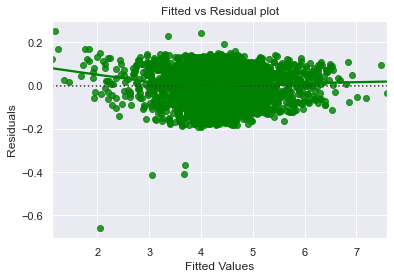

<IPython.core.display.Javascript object>

In [93]:
# let's plot the fitted values vs residuals

sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="green", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

* The scatter plot shows the distribution of residuals (errors) vs fitted values (predicted values).

* If there exist any pattern in this plot, we consider it as signs of non-linearity in the data and a pattern means that the model doesn't capture non-linear effects.

* **We see no pattern in the plot above. Hence, the assumptions of linearity and independence are satisfied.**

### TEST FOR NORMALITY

**Why the test?**

* Error terms, or residuals, should be normally distributed. If the error terms are not normally distributed, confidence intervals of the coefficient estimates may become too wide or narrow. Once confidence interval becomes unstable, it leads to difficulty in estimating coefficients based on minimization of least squares. Non-normality suggests that there are a few unusual data points that must be studied closely to make a better model.

**How to check normality?**

* The shape of the histogram of residuals can give an initial idea about the normality.
* It can also be checked via a Q-Q plot of residuals. If the residuals follow a normal distribution, they will make a straight line plot, otherwise not.
* Other tests to check for normality includes the Shapiro-Wilk test.
    - Null hypothesis: Residuals are normally distributed
    - Alternate hypothesis: Residuals are not normally distributed

**How to fix if this assumption is not followed?**

* We can apply transformations like log, exponential, arcsinh, etc. as per our data.

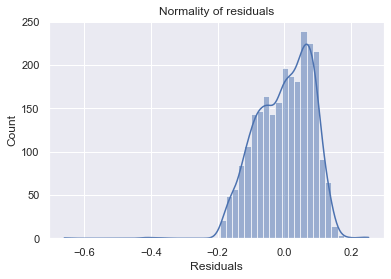

<IPython.core.display.Javascript object>

In [94]:
sns.histplot(data=df_pred, x="Residuals", kde=True)
plt.title("Normality of residuals")
plt.show()

- The histogram of residuals does have a bell shape.
- Let's check the Q-Q plot.

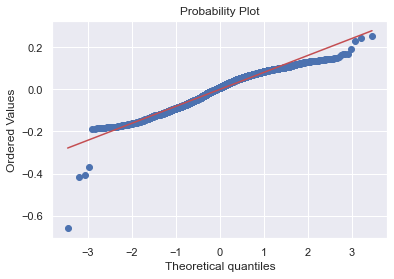

<IPython.core.display.Javascript object>

In [95]:
import pylab
import scipy.stats as stats

stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

- The residuals more or less follow a straight line except for the tails.
- Let's check the results of the Shapiro-Wilk test.

In [96]:
stats.shapiro(df_pred["Residuals"])

ShapiroResult(statistic=0.9648647308349609, pvalue=3.294836723343184e-24)

<IPython.core.display.Javascript object>

- Since p-value < 0.05, the residuals are not normal as per the Shapiro-Wilk test.
- Strictly speaking, the residuals are not normal.
- However, as an approximation, we can accept this distribution as close to being normal.
- **So, the assumption is satisfied.**

### TEST FOR HOMOSCEDASTICITY

* **Homoscedascity**: If the variance of the residuals is symmetrically distributed across the regression line, then the data is said to be homoscedastic.

* **Heteroscedascity**: If the variance is unequal for the residuals across the regression line, then the data is said to be heteroscedastic.

**Why the test?** 

* The presence of non-constant variance in the error terms results in heteroscedasticity. Generally, non-constant variance arises in presence of outliers.

**How to check for homoscedasticity?**

* The residual vs fitted values plot can be looked at to check for homoscedasticity. In the case of heteroscedasticity, the residuals can form an arrow shape or any other non-symmetrical shape.
* The goldfeldquandt test can also be used. If we get a p-value > 0.05 we can say that the residuals are homoscedastic. Otherwise, they are heteroscedastic.
    - Null hypothesis: Residuals are homoscedastic
    - Alternate hypothesis: Residuals have heteroscedasticity

**How to fix if this assumption is not followed?**

* Heteroscedasticity can be fixed by adding other important features or making transformations.

In [97]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], x_train4)
lzip(name, test)

[('F statistic', 1.0536161375145259), ('p-value', 0.17890902314229992)]

<IPython.core.display.Javascript object>

**Since p-value > 0.05, we can say that the residuals are homoscedastic. So, this assumption is satisfied.**

**Now that we have checked all the assumptions of linear regression and they are satisfied, we can move towards the prediction part.**

In [98]:
# predictions on the test set
pred = olsmod2.predict(x_test4)

df_pred_test = pd.DataFrame({"Actual": y_test, "Predicted": pred})
df_pred_test.sample(10, random_state=1)

,Actual,Predicted
2098,3.450622,3.459016
278,5.281527,5.297750
26,5.754666,5.698386
2910,4.510530,4.474134
2631,4.251348,4.184675
1582,4.506233,4.635751
2110,6.070230,5.985388
3160,4.194793,4.118680
2817,4.760206,4.657859
549,3.696103,3.783706


<IPython.core.display.Javascript object>

- We can observe here that our model has returned pretty good prediction results, and the actual and predicted values are comparable.

- We can also visualize comparison result as a bar graph.

**Note**: As the number of records is large, for representation purpose, we are taking a sample of 25 records only.

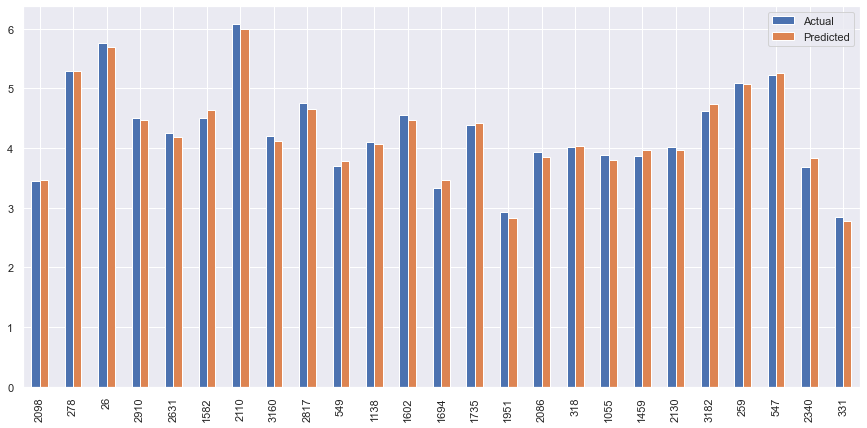

<IPython.core.display.Javascript object>

In [99]:
df1 = df_pred_test.sample(25, random_state=1)
df1.plot(kind="bar", figsize=(15, 7))
plt.show()

In [100]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmod2_train_perf = model_performance_regression(olsmod2, x_train4, y_train)
olsmod2_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.082072,0.068225,0.990021,0.989985,1.667946


<IPython.core.display.Javascript object>

In [101]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmod2_test_perf = model_performance_regression(olsmod2, x_test4, y_test)
olsmod2_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.080455,0.068999,0.989913,0.989828,1.650728


<IPython.core.display.Javascript object>

* The model is able to explain ~99% of the variation in the data, which is very good.

* The train and test RMSE and MAE are low and comparable. So, our model is not suffering from overfitting.

* The MAPE on the test set suggests we can predict within 1.7% of the used prices. 

* Hence, we can conclude the model *olsmod2* is good for prediction as well as inference purposes.

**Let's compare the initial model created with sklearn and the final statsmodels model.**

In [102]:
# training performance comparison

models_train_comp_df = pd.concat(
    [linearregression_train_perf.T, olsmod2_train_perf.T], axis=1,
)

models_train_comp_df.columns = [
    "Linear Regression sklearn",
    "Linear Regression statsmodels",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Linear Regression sklearn,Linear Regression statsmodels
RMSE,0.081557,0.082072
MAE,0.067524,0.068225
R-squared,0.990146,0.990021
Adj. R-squared,0.989953,0.989985
MAPE,1.650207,1.667946


<IPython.core.display.Javascript object>

* The performance of the two models is close to each other.

**Let's recreate the final statsmodels model and print it's summary to gain insights.**

In [103]:
olsmodel_final = sm.OLS(y_train, x_train4).fit()
print(olsmodel_final.summary())

                            OLS Regression Results                            
Dep. Variable:         used_price_log   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 3.088e+04
Date:                Sun, 24 Oct 2021   Prob (F-statistic):               0.00
Time:                        10:38:31   Log-Likelihood:                 2702.0
No. Observations:                2499   AIC:                            -5386.
Df Residuals:                    2490   BIC:                            -5334.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -10.3593      2.85

<IPython.core.display.Javascript object>

## Actionable Insights 


- *days_used*, *new_price*, *brand_name_Gionee*, *brand_name_Lenovo*, *selfie_camera_mp*, *4g* and *5g* are the factors that most affects the price of used phones.
- A higher priced new phone will lead to an increase in the price of used phone. 
- *days_used* and *brand_name_Gionee*, *brand_name_Lenovo*, and *4g* have a negative effect on the price of used phones.
- *new_price*, *selfie_camera_mp*, *release_year* and *5g* have positive coefficients. So, as they increase, used price also increases.


## Recommendations

- Focus on newer phones with high selfie camera resolution and 5g. There have a favorable impact on used phone prices.
- Avoid older phones with 4g and brand names like Gionee and Lenovo.